# Método de Interpolación de Lagrange
Es un método numérico que genera un polinomio único de grado `n` que pasa por los `n+1` puntos de una función dentro de un intervalo cerrado (Triguero, P. 2023). Esto se fundamenta en el **Teorema de Weierstrass** que establece que dada una función definida existe un polinomio que se ajusta cuanto se necesite a dicha función (Pinkus, A. 2000).

### Fundamento matemático
Para el método de Lagrange se tendrán `n` funciones que llamaremos $L_i(xi)$, por lo que notación pasa a $L_{n,i}(x)$. Sin pormenorizar demasiado en la demostración formal de este método podemos establecer que:

$$L_{n,i}(x) = \prod_{j=0 \atop j \neq i}^{n} \frac{(x - x_j)}{(x_i - x_j)}$$

Así, el polinomio de interpolación de Lagrange $p_n(x)$ de grado `n` tiene la siguiente forma general:

$$ p_n(x) = L_{n,0}(x)f(x_0) + L_{n,1}(x)f(x_1) + \dots + L_{n,n}(x)f(x_n) = \sum_{i=1}^{n} L_{n,i}(x)f(x_i)$$

### Aplicación computacional
Dentro del extenso ecosistema de Python se destaca la biblioteca de computación científica conocida como `Scipy`. En este marco, se encuentra un módulo dedicado a la interpolación, que incluye el método de [Lagrange](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange), que utilizaremos en esta actividad:

*`scipy.interpolate.lagrange(x, w)`

Éste método devuelve un polinomio de interpolación de Lagrange.

**Importante:** De acuerdo con la [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html#scipy.interpolate.lagrange) oficial de Scipy `version 1.11.4`, la implementación de Lagrange es numéricamente **inestable**. Por lo que no se recomienda utilizar más de unos 20 puntos incluso si se eligieron de manera óptima.

## Funciones
* $f(x) = \sin(x)$

* $f(x) = \frac{1}{1 + 25x^2}$

* $f(x) = e^{-20x^2}$


## Bibliotecas y dependencias

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial
cmap = cm.jet

## Nodos de interpolación
Importamos los nodos de interpolación que ya hemos determinado mediante el método de `Chebyshev` y además los nodos equiespaciados

In [2]:
x_ch_11 = np.loadtxt('nodos_11.txt', delimiter='\t')
x_ch_21 = np.loadtxt('nodos_21.txt', delimiter='\t')

x_equi_11 = np.loadtxt('nodos_equis_11.txt', delimiter='\t')
x_equi_21 = np.loadtxt('nodos_equis_21.txt', delimiter='\t')

## Polinomio de interpolación
Definimos nuevamente las funciones en Python

In [3]:
#Funciones de trabajo

def y_1(x:np.array)->np.array:
  '''
  Devuelve el resultado del seno de cada elemento de x
    y = np.sin(x)
  inputs:
    x (np.array): arreglo unidimensional de valores de x en radianes

  return:
    sin(x) (np.array): seno del ángulo para cada valor de x
  '''
  return np.sin(x)

def y_2(x:np.array)->np.array:
  '''
  Devuelve el resultado de la expresión 1/(1+(25*x**2)) para cada elemento de x
    y = 1/(1+(25*x**2))
  inputs:
    x(np.array): arreglo unidimensional de valores de x

  return:
    1/(1+(25*x**2)) (np.array): resultado de la expresión dada para cada valor de x
  '''
  return 1/(1+(25*x**2))

def y_3(x:np.array)->np.array:
  '''
  Devuelve el resultado de la expresión np.exp(-20*x**2) para cada elemento de x
    y = np.exp(-20*x**2)
  inputs:
    x (np.array): arreglo unidimensional de valores de x

  return:
    np.exp(-20*x**2) (np.array): resultado de la expresión para cada valor de x
  '''

  return np.exp(-20*x**2)

Determinamos el Polinomio de interpolación para cada función dados 11 y 21 nodos (x array) en cada función, calcularemos el tiempo de ejecución y graficaremos la solución obtenida con puntos equiespaciados de x.

### Cálculos del error y tiempos de ejecución

Para el cálculo del error utilizaremos la ecuación del error absoluto definido en la siguiente expresión:
$$err = \left\| P(x) - f(x) \right\|$$

Donde $f(x)$, la función que se va a aproximar y $P(x)$ el polinomio de Lagrange obtenido.

El cálculo del tiempo de ejecución se ejecutará mediante la función `time` ejecutada en `bash`

### función sin(x)

* Para 11 nodos de `Chebyshev`

El polinomio obtenido es de grado 10 desde donde posteriormente extraremos los coeficientes.

In [4]:
%%time
w_ch_11_f1 = y_1(x_ch_11) # f(x)
poly_ch_11_f1 = lagrange(x_ch_11, w_ch_11_f1) # Polinomio de grado 10
Polynomial(poly_ch_11_f1.coef[::-1]) # resultado simbólico del polinomio

CPU times: user 9.22 ms, sys: 59 µs, total: 9.28 ms
Wall time: 13.1 ms


Polynomial([-9.45195531e-22,  9.99978840e-01,  9.45099034e-16, -1.66623646e-01,
        5.52943108e-17,  8.30871554e-03,  8.63567030e-17, -1.92613589e-04,
       -2.76878130e-17,  2.14623571e-06,  5.61582844e-19], domain=[-1,  1], window=[-1,  1])

podemos extraer los coeficientes del polinomio obtenido de la siguiente forma:

In [5]:
coeffs_ch_11_f1 = Polynomial(poly_ch_11_f1.coef[::-1]).coef
coeffs_ch_11_f1

array([-9.45195531e-22,  9.99978840e-01,  9.45099034e-16, -1.66623646e-01,
        5.52943108e-17,  8.30871554e-03,  8.63567030e-17, -1.92613589e-04,
       -2.76878130e-17,  2.14623571e-06,  5.61582844e-19])

A continuación, graficaremos los resultados obtenidos a fin de comparar la bondad de ajuste entre el resultado real y la aproximación polinomial. El dominio de las funciones será el mismo utilizado al momento de encontrar los nodos de `Chebyshev`, es decir en el intervalo $[-\pi , \pi]$

<ipython-input-6-fcf49df64b63>:3: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_ch_11, w_ch_11_f1, label='data fitted',c=cmap(0.2))


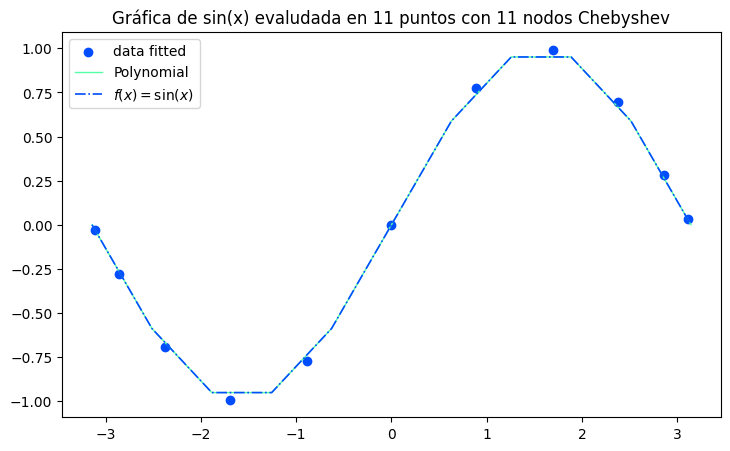

In [6]:
x = np.linspace(-np.pi, np.pi, 11)
plt.figure(figsize=(8.5,5))
plt.scatter(x_ch_11, w_ch_11_f1, label='data fitted',c=cmap(0.2))
plt.plot(x, Polynomial(poly_ch_11_f1.coef[::-1])(x), label='Polynomial', linewidth=1, color=cmap(0.45))
plt.plot(x, y_1(x),
         label=r"$f(x) = \sin(x)$", linestyle='-.', linewidth=1.2, color=cmap(0.2))
plt.title(f'Gráfica de sin(x) evaludada en 11 puntos con 11 nodos Chebyshev')
plt.legend()
plt.show()

In [7]:
#error absoluto
e = np.sum(np.abs((poly_ch_11_f1(x) - y_1(x))))
print(f'Error absoluto: {e:.8f}')


Error absoluto: 0.00004926


* Para 21 nodos de `Chebyshev`

Llegados a este punto, podemos definir una función general que englobe los pasos anteriores y que pueda ser reproducida en las siguientes implementaciones. La función definida lleva por nombre: `lagrange_interpolation`

In [8]:
def lagrange_interpolation(x_data:np.array,
                           w_data:np.array,
                           f_evaluate:callable,
                           f_name:str,
                           interval:list,
                           n:int,
                           method:str='Chebyshev')->tuple:
    '''
    Realiza la interpolación polinómica de Lagrange y devuelve el polinomio simbólico obtenido, sus coeficientes
    y el error absoluto porcentual obtenido con respecto a la función evaluada.

    Parámetros:
    - x_data (np.array): Array de datos x.
    - w_data (np.array): Array de datos y correspondientes a x o f(x).
    - f_evaluate(callable): Función que será evaluada graficamente.
    - f_name (str): Etiqueta para la función a evaluar en la demostración gráfica, en formato LATeX.
    - interval (list): Intervalo cerrado donde estará definida la función.
    - n (int): Número de puntos a generar en el intervalo.

    Devuelve:
    - tuple: Tupla que contiene el polinomio simbólico, sus coeficientes y el error absoluto.

    Ejemplo de uso:
    poly_symb, coeffs, err = lagrange_interpolation(x_data, w_data, '$Función a Evaluar$', [a, b], num_points)

    '''
    x = np.linspace(interval[0], interval[1], n)
    n_nodos = len(x_data)
    poly_fitted = lagrange(x_data, w_data) # Polinomio de grado [length(x_data) - 1]
    poly_symb = Polynomial(poly_fitted.coef[::-1]) # resultado simbólico del polinomio
    coeffs = Polynomial(poly_fitted.coef[::-1]).coef # obtención de coeficientes en orden inverso
    err = np.sum(np.absolute((poly_fitted(x) - f_evaluate(x))))
    err = "{:.4f}".format(err)


    # demostración gráfica
    plt.figure(figsize=(8.5,5))
    plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))
    plt.plot(x, Polynomial(poly_fitted.coef[::-1])(x), label='Polynomial', linewidth=1, color=cmap(0.45))
    plt.plot(x, f_evaluate(x),
            label=f_name, linestyle='-.', linewidth=1.2, color=cmap(0.2))
    plt.title(f'Gráfica de {f_name} evaluada en {n} puntos con {n_nodos} nodos {method}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()
    return poly_symb, coeffs, err

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


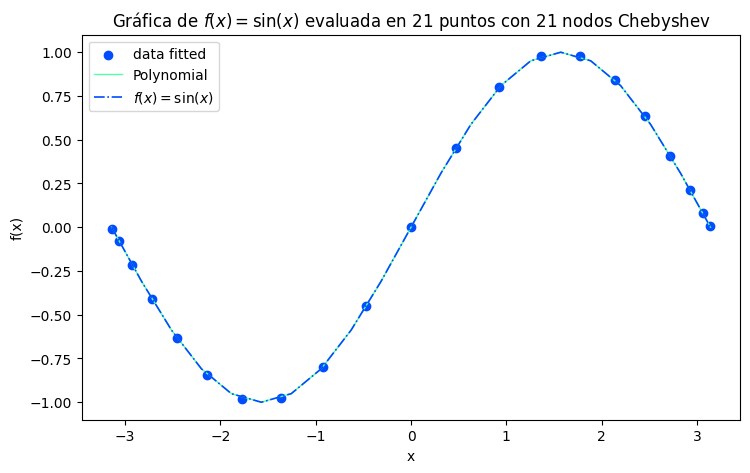

CPU times: user 515 ms, sys: 93.9 ms, total: 609 ms
Wall time: 605 ms


In [9]:
%%time
w_ch_21_f1 = y_1(x_ch_21) # f(x)
P_ch_21_f1, coeffs_ch_21_f1, err_ch_21_f1 = lagrange_interpolation(x_ch_21,
                                         w_ch_21_f1,
                                         f_evaluate=y_1,
                                         f_name=r"$f(x) = \sin(x)$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_ch_21))

In [10]:
P_ch_21_f1

Polynomial([-2.08980251e-30,  1.00000000e+00, -2.88723039e-15, -1.66666667e-01,
       -2.03452706e-14,  8.33333333e-03,  9.40085683e-14, -1.98412698e-04,
        4.65296204e-14,  2.75573192e-06, -3.93420106e-14, -2.50520771e-08,
       -5.19902047e-15,  1.60588196e-10,  5.34877589e-16, -7.64593690e-13,
        4.21483595e-18,  2.79452581e-15, -8.00657893e-19, -7.22072261e-18,
       -2.26978360e-21], domain=[-1,  1], window=[-1,  1])

In [11]:
coeffs_ch_21_f1

array([-2.08980251e-30,  1.00000000e+00, -2.88723039e-15, -1.66666667e-01,
       -2.03452706e-14,  8.33333333e-03,  9.40085683e-14, -1.98412698e-04,
        4.65296204e-14,  2.75573192e-06, -3.93420106e-14, -2.50520771e-08,
       -5.19902047e-15,  1.60588196e-10,  5.34877589e-16, -7.64593690e-13,
        4.21483595e-18,  2.79452581e-15, -8.00657893e-19, -7.22072261e-18,
       -2.26978360e-21])

In [12]:
print(f'Error absoluto: {err_ch_21_f1}')

Error absoluto: 0.0000


* Para 11 nodos equiespaciados

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


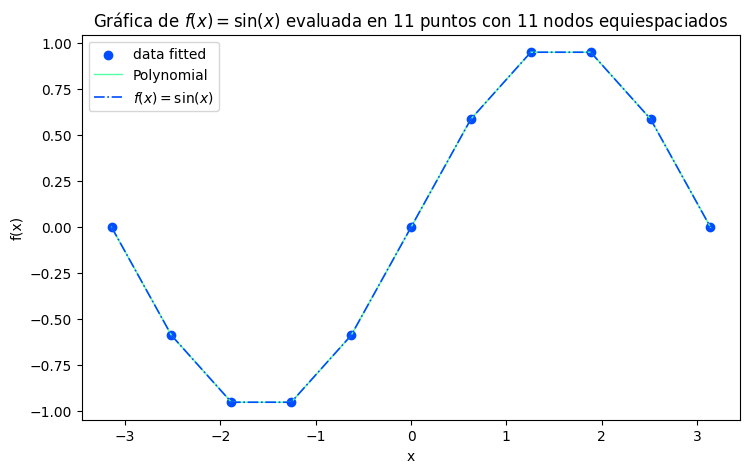

CPU times: user 401 ms, sys: 59.2 ms, total: 460 ms
Wall time: 473 ms


In [13]:
%%time
w_equi_11_f1 = y_1(x_equi_11)
P_equi_11_f1, coeffs_equi_11_f1, err_equi_11_f1 = lagrange_interpolation(x_equi_11,
                                         w_equi_11_f1,
                                         y_1,
                                         f_name=r"$f(x) = \sin(x)$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_equi_11),
                                        method='equiespaciados')

In [14]:
P_equi_11_f1

Polynomial([ 0.00000000e+00,  9.99996991e-01, -5.44653932e-16, -1.66655489e-01,
       -4.26919534e-16,  8.32300768e-03, -1.16038027e-15, -1.94869471e-04,
        1.25936238e-18,  2.25910135e-06, -6.74107116e-19], domain=[-1,  1], window=[-1,  1])

In [15]:
coeffs_equi_11_f1

array([ 0.00000000e+00,  9.99996991e-01, -5.44653932e-16, -1.66655489e-01,
       -4.26919534e-16,  8.32300768e-03, -1.16038027e-15, -1.94869471e-04,
        1.25936238e-18,  2.25910135e-06, -6.74107116e-19])

In [16]:
print(f'Error absoluto: {err_equi_11_f1}')

Error absoluto: 0.0000


* Para 21 nodos equiespaciados

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


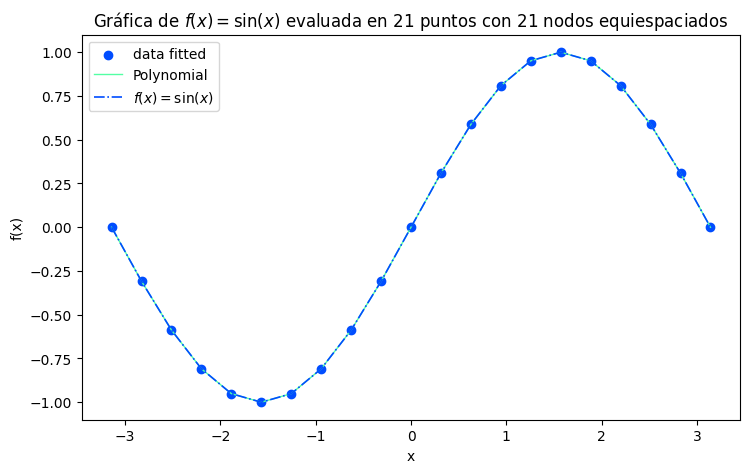

CPU times: user 514 ms, sys: 103 ms, total: 617 ms
Wall time: 549 ms


In [17]:
%%time
w_equi_21_f1 = y_1(x_equi_21)
P_equi_21_f1, coeffs_equi_21_f1, err_equi_21_f1 = lagrange_interpolation(x_equi_21,
                                         w_equi_21_f1,
                                         y_1,
                                         f_name=r"$f(x) = \sin(x)$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_equi_21),
                                         method='equiespaciados')

### función $f(x) = \frac{1}{1 + 25x^2}$

* Para 11 nodos de `Chebyshev`:

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


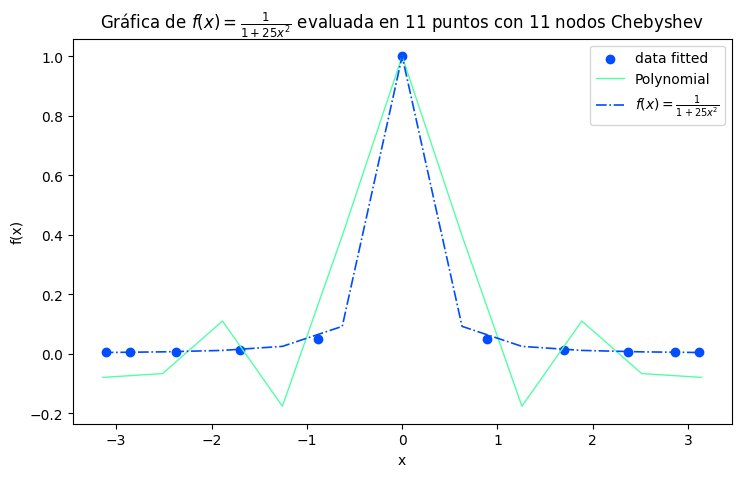

CPU times: user 456 ms, sys: 251 ms, total: 707 ms
Wall time: 458 ms


In [18]:
%%time
w_ch_11_f2 = y_2(x_ch_11)
P_ch_11_f2, coeffs_ch_11_f2, err_ch_11_f2 = lagrange_interpolation(x_ch_11,
                                         w_ch_11_f2,
                                         y_2,
                                         f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_ch_11))

In [19]:
P_ch_11_f2

Polynomial([ 1.00000000e+00, -3.10249873e-15, -1.91413500e+00,  1.95871964e-15,
        1.07163154e+00, -9.72691979e-16, -2.46891437e-01,  5.04696111e-17,
        2.49509280e-02, -7.52588774e-18, -9.17940830e-04], domain=[-1,  1], window=[-1,  1])

In [20]:
coeffs_ch_11_f2

array([ 1.00000000e+00, -3.10249873e-15, -1.91413500e+00,  1.95871964e-15,
        1.07163154e+00, -9.72691979e-16, -2.46891437e-01,  5.04696111e-17,
        2.49509280e-02, -7.52588774e-18, -9.17940830e-04])

In [21]:
print(f'Error absoluto: {err_ch_11_f2}')

Error absoluto: 1.5227


* Para 21 nodos de `Chebyshev`:

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


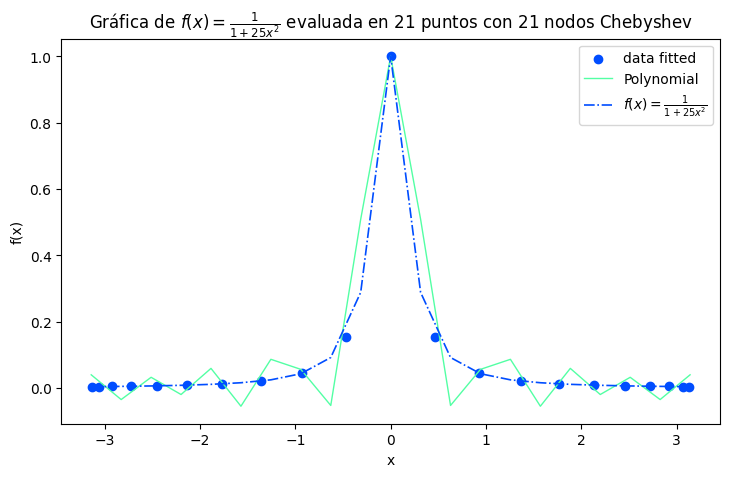

CPU times: user 441 ms, sys: 247 ms, total: 688 ms
Wall time: 437 ms


In [22]:
%%time
w_ch_21_f2 = y_2(x_ch_21)
P_ch_21_f2, coeffs_ch_21_f2, err_ch_21_f2 = lagrange_interpolation(x_ch_21,
                                         w_ch_21_f2,
                                         y_2,
                                         f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_ch_21))

In [23]:
P_ch_21_f2

Polynomial([ 1.00000000e+00,  4.19073955e-15, -6.12202664e+00,  2.22602969e-14,
        1.27831682e+01,  1.61635462e-13, -1.25985178e+01,  5.10403352e-14,
        6.88873107e+00,  2.73125706e-14, -2.27296993e+00, -2.85825508e-15,
        4.70962152e-01, -2.34426194e-15, -6.16811912e-02, -4.79147904e-16,
        4.95589408e-03, -6.31246010e-18, -2.22942418e-04, -9.70109151e-20,
        4.29930766e-06], domain=[-1,  1], window=[-1,  1])

In [24]:
coeffs_ch_21_f2

array([ 1.00000000e+00,  4.19073955e-15, -6.12202664e+00,  2.22602969e-14,
        1.27831682e+01,  1.61635462e-13, -1.25985178e+01,  5.10403352e-14,
        6.88873107e+00,  2.73125706e-14, -2.27296993e+00, -2.85825508e-15,
        4.70962152e-01, -2.34426194e-15, -6.16811912e-02, -4.79147904e-16,
        4.95589408e-03, -6.31246010e-18, -2.22942418e-04, -9.70109151e-20,
        4.29930766e-06])

In [25]:
print(f'Error absoluto: {err_ch_21_f2}')

Error absoluto: 1.3764


* Para 11 nodos equiespaciados

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


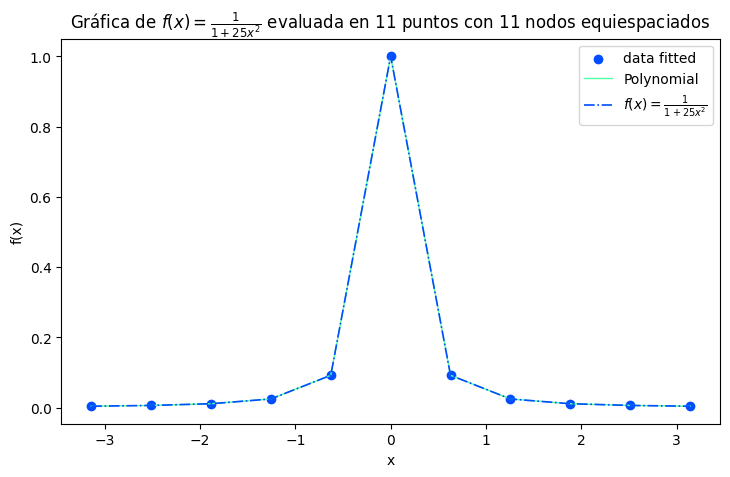

CPU times: user 477 ms, sys: 224 ms, total: 701 ms
Wall time: 453 ms


In [26]:
%%time
w_equi_11_f2 = y_2(x_equi_11)
P_equi_11_f2, coeffs_equi_11_f2, err_equi_11_f2 = lagrange_interpolation(x_equi_11,
                                         w_equi_11_f2,
                                         y_2,
                                         f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_equi_11),
                                         method='equiespaciados')

In [27]:
P_equi_11_f2

Polynomial([ 1.00000000e+00, -1.85894086e-16, -3.33282994e+00,  8.46097823e-16,
        2.99252684e+00,  2.65938530e-15, -1.00614319e+00, -5.12905555e-16,
        1.36528323e-01, -2.11008613e-17, -6.27626117e-03], domain=[-1,  1], window=[-1,  1])

In [28]:
coeffs_equi_11_f2

array([ 1.00000000e+00, -1.85894086e-16, -3.33282994e+00,  8.46097823e-16,
        2.99252684e+00,  2.65938530e-15, -1.00614319e+00, -5.12905555e-16,
        1.36528323e-01, -2.11008613e-17, -6.27626117e-03])

In [29]:
print(f'Error absoluto: {err_equi_11_f2}')

Error absoluto: 0.0000


* Para 21 nodos equiespaciados

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


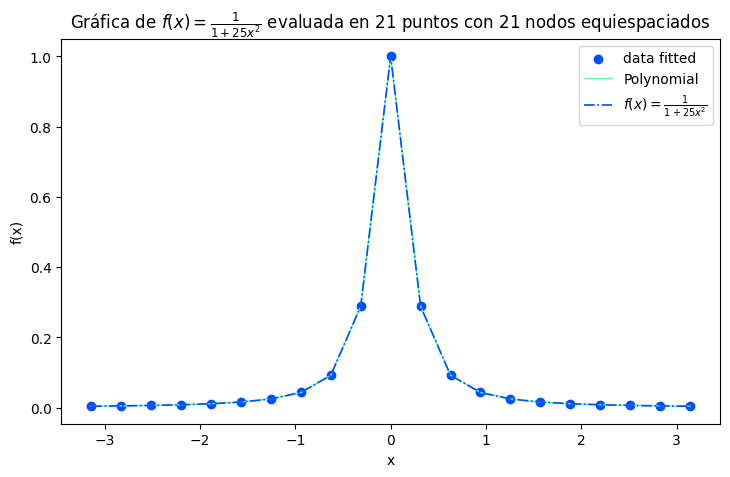

CPU times: user 475 ms, sys: 244 ms, total: 720 ms
Wall time: 444 ms


In [30]:
%%time
w_equi_21_f2 = y_2(x_equi_21)
P_equi_21_f2, coeffs_equi_21_f2, err_equi_21_f2 = lagrange_interpolation(x_equi_21,
                                         w_equi_21_f2,
                                         y_2,
                                         f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=21,
                                         method='equiespaciados')

In [31]:
P_equi_21_f2

Polynomial([ 1.00000000e+00,  1.84055072e-16, -1.06722017e+01,  7.30231329e-14,
        4.18237908e+01,  3.40752468e-13, -7.49965649e+01, -3.97500606e-14,
        7.12066164e+01, -3.97794462e-13, -3.89074144e+01, -2.73190188e-13,
        1.27626834e+01, -1.10335080e-13, -2.53769817e+00, -7.90693643e-15,
        2.97791047e-01,  2.70249475e-16, -1.88770159e-02,  1.75895620e-18,
        4.96267610e-04], domain=[-1,  1], window=[-1,  1])

In [32]:
coeffs_equi_21_f2

array([ 1.00000000e+00,  1.84055072e-16, -1.06722017e+01,  7.30231329e-14,
        4.18237908e+01,  3.40752468e-13, -7.49965649e+01, -3.97500606e-14,
        7.12066164e+01, -3.97794462e-13, -3.89074144e+01, -2.73190188e-13,
        1.27626834e+01, -1.10335080e-13, -2.53769817e+00, -7.90693643e-15,
        2.97791047e-01,  2.70249475e-16, -1.88770159e-02,  1.75895620e-18,
        4.96267610e-04])

In [33]:
print(f'Error absoluto: {err_equi_21_f2}')

Error absoluto: 0.0000


### función  $f(x) = e^{-20x^2}$

* Para 11 nodos de `Chebyshev`:

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


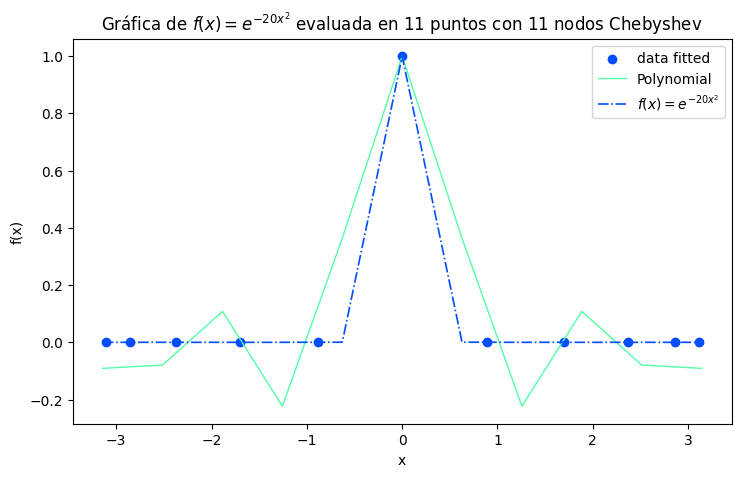

CPU times: user 514 ms, sys: 101 ms, total: 615 ms
Wall time: 525 ms


In [34]:
%%time
w_ch_11_f3 = y_3(x_ch_11)
P_ch_11_f3, coeffs_ch_11_f3, err_ch_11_f3 = lagrange_interpolation(x_ch_11,
                                         w_ch_11_f3,
                                         y_3,
                                         f_name=r"$f(x) = e^{-20x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_ch_11))

In [35]:
P_ch_11_f3

Polynomial([ 1.00000000e+00, -3.49718943e-15, -2.02642329e+00,  2.33145832e-15,
        1.14978972e+00, -1.05470927e-15, -2.66281263e-01,  6.93886413e-17,
        2.69799324e-02, -7.80624479e-18, -9.94050421e-04], domain=[-1,  1], window=[-1,  1])

In [36]:
coeffs_ch_11_f3

array([ 1.00000000e+00, -3.49718943e-15, -2.02642329e+00,  2.33145832e-15,
        1.14978972e+00, -1.05470927e-15, -2.66281263e-01,  6.93886413e-17,
        2.69799324e-02, -7.80624479e-18, -9.94050421e-04])

In [37]:
print(f'Error absoluto: {err_ch_11_f3}')

Error absoluto: 1.7302


* Para 21 nodos de `Chebyshev`:

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


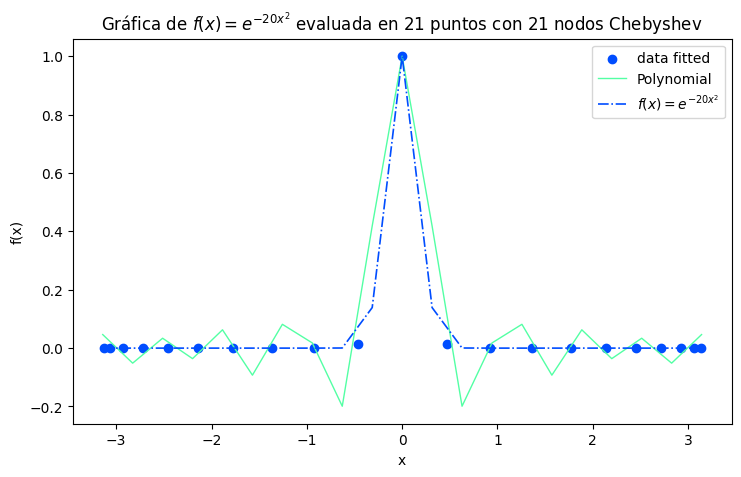

CPU times: user 397 ms, sys: 106 ms, total: 503 ms
Wall time: 384 ms


In [38]:
%%time
w_ch_21_f3 = y_3(x_ch_21)
P_ch_21_f3, coeffs_ch_21_f3, err_ch_21_f3 = lagrange_interpolation(x_ch_21,
                                         w_ch_21_f3,
                                         y_3,
                                         f_name=r"$f(x) = e^{-20x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_ch_21))

In [39]:
P_ch_21_f3

Polynomial([ 1.00000000e+00,  5.02810538e-15, -7.31777422e+00,  1.61091951e-14,
        1.59387092e+01,  1.73824329e-13, -1.59622063e+01,  6.62690394e-14,
        8.79579671e+00,  6.01976705e-14, -2.91480167e+00,  5.66301731e-15,
        6.05562644e-01, -1.37672207e-15, -7.94493648e-02, -4.94152937e-16,
        6.39133735e-03, -5.54803353e-18, -2.87771659e-04, -1.35019282e-19,
        5.55318994e-06], domain=[-1,  1], window=[-1,  1])

In [40]:
coeffs_ch_21_f3

array([ 1.00000000e+00,  5.02810538e-15, -7.31777422e+00,  1.61091951e-14,
        1.59387092e+01,  1.73824329e-13, -1.59622063e+01,  6.62690394e-14,
        8.79579671e+00,  6.01976705e-14, -2.91480167e+00,  5.66301731e-15,
        6.05562644e-01, -1.37672207e-15, -7.94493648e-02, -4.94152937e-16,
        6.39133735e-03, -5.54803353e-18, -2.87771659e-04, -1.35019282e-19,
        5.55318994e-06])

In [41]:
print(f'Error absoluto: {err_ch_21_f3}')

Error absoluto: 1.8030


* Para 11 nodos equiespaciados

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


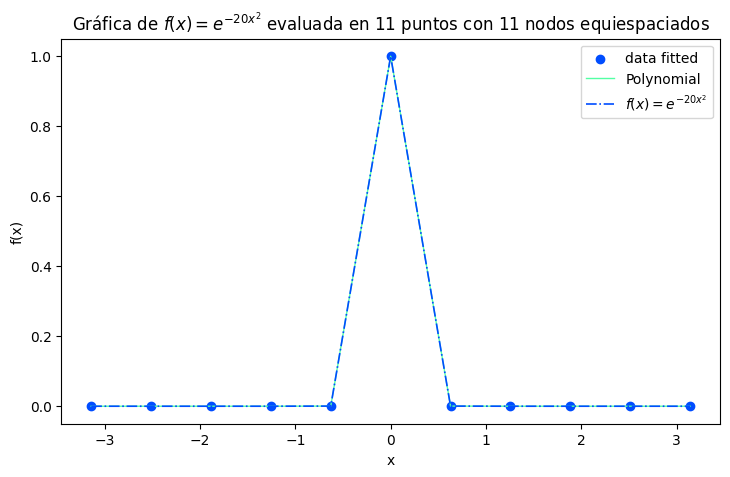

CPU times: user 450 ms, sys: 55.8 ms, total: 506 ms
Wall time: 609 ms


In [42]:
%%time
w_equi_11_f3 = y_3(x_equi_11)
P_equi_11_f3, coeffs_equi_11_f3, err_equi_11_f3 = lagrange_interpolation(x_equi_11,
                                         w_equi_11_f3,
                                         y_3,
                                         f_name=r"$f(x) = e^{-20x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_equi_11),
                                         method='equiespaciados')

In [43]:
P_equi_11_f3

Polynomial([ 1.00000000e+00, -1.66541900e-16, -3.70579831e+00,  8.88209798e-16,
        3.40455306e+00,  2.66455698e-15, -1.15392762e+00, -4.99560331e-16,
        1.57143549e-01, -2.08216639e-17, -7.23717754e-03], domain=[-1,  1], window=[-1,  1])

In [44]:
coeffs_equi_11_f3

array([ 1.00000000e+00, -1.66541900e-16, -3.70579831e+00,  8.88209798e-16,
        3.40455306e+00,  2.66455698e-15, -1.15392762e+00, -4.99560331e-16,
        1.57143549e-01, -2.08216639e-17, -7.23717754e-03])

In [45]:
print(f'Error absoluto: {err_equi_11_f3}')

Error absoluto: 0.0000


* Para 21 nodos equiespaciados

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


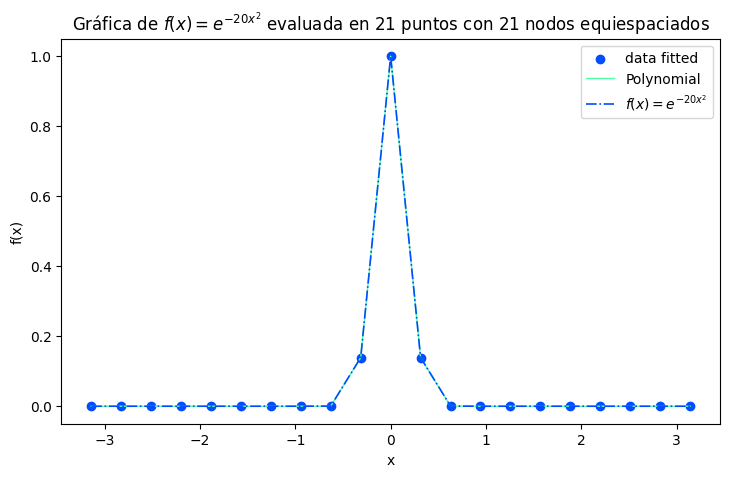

CPU times: user 499 ms, sys: 100 ms, total: 600 ms
Wall time: 606 ms


In [46]:
%%time
w_equi_21_f3 = y_3(x_equi_21)
P_equi_21_f3, coeffs_equi_21_f3, err_equi_21_f3 = lagrange_interpolation(x_equi_21,
                                         w_equi_21_f3,
                                         y_3,
                                         f_name=r"$f(x) = e^{-20x^2}$",
                                         interval=[-np.pi, np.pi],
                                         n=len(x_equi_21),
                                         method='equiespaciados')

In [47]:
P_equi_21_f3

Polynomial([ 1.00000000e+00,  4.09048944e-16, -1.31446907e+01,  7.44333817e-14,
        5.35046810e+01,  2.81633330e-13, -9.70075735e+01, -1.77481998e-13,
        9.25023801e+01, -5.90735316e-13, -5.06459174e+01, -3.52931522e-13,
        1.66312654e+01, -1.14603589e-13, -3.30902527e+00, -1.00223302e-14,
        3.88459510e-01,  1.70073687e-16, -2.46310307e-02,  1.79235863e-18,
        6.47656042e-04], domain=[-1,  1], window=[-1,  1])

In [48]:
coeffs_equi_21_f3

array([ 1.00000000e+00,  4.09048944e-16, -1.31446907e+01,  7.44333817e-14,
        5.35046810e+01,  2.81633330e-13, -9.70075735e+01, -1.77481998e-13,
        9.25023801e+01, -5.90735316e-13, -5.06459174e+01, -3.52931522e-13,
        1.66312654e+01, -1.14603589e-13, -3.30902527e+00, -1.00223302e-14,
        3.88459510e-01,  1.70073687e-16, -2.46310307e-02,  1.79235863e-18,
        6.47656042e-04])

In [49]:
print(f'Error absoluto: {err_equi_21_f3}')

Error absoluto: 0.0000


### Análisis de Sensibilidad

Dado que teóricamente las gráficas polinomiales se ajustarían mejor con a un mayor número de puntos evaluados, sería interesante experimentar como se vería afectado el error absoluto y el tiempo de ejecución en otros escenarios. En este sentido, aplicaremos la interpolación de lagrange para `n = [30, 50, 100, 150]` y apuntaremos los resultados. En esta ocasión el tiempo de ejecución será evaluado mediante la función `time` de la biblioteca `time` de Python

In [50]:
def sensibility_analysis(n_evaluation:list,
                         interval:list,
                         x_data:np.array,
                         w_data:np.array,
                         f_evaluate:callable,
                         f_name:str,
                         method:str):
    '''
    Realiza un análisis de sensibilidad variando el número de puntos de evaluación.

    Parámetros:
    - n_evaluation (list): Lista de valores para el número de puntos de evaluación.
    - interval (list): Lista que representa el intervalo de evaluación [a, b].
    - x_data (np.array): Array de datos x para la interpolación.
    - w_data (np.array): Array de datos w para la interpolación.
    - f_evaluate (callable): Función a evaluar para la interpolación.
    - f_name (str): Nombre de la función para etiquetar los resultados.
    - method (str): Nombre del método de nodos analizado: Chebyshev o equiespaciados.

    Devuelve:
    - pd.DataFrame: DataFrame con los resultados del análisis de sensibilidad.

    Ejemplo:
        n_values = [30, 50, 100]
        interval_values = [-2*np.pi, 2*np.pi]
        x_values = np.array([1, 2, 3, 4, 5])
        w_values = np.array([0.1, 0.2, 0.3, 0.4, 0.5])
        def f_evaluate(x): return np.sin(x)
        method = 'Chebyshev'
        results_df = sensibility_analysis(n_values,
                                          interval_values,
                                          x_values,
                                          w_values,
                                          f_evaluate,
                                          "sin(x)",
                                          "Chebyshev")
    '''
    results_dict = {}
    for i in n_evaluation:
        start_time = time.time()
        P, C, E = lagrange_interpolation(x_data=x_data,
                            w_data=w_data,
                            f_evaluate=f_evaluate,
                            f_name=f_name,
                            interval=interval,
                            n=i,
                            method=method)
        end_time = time.time()
        execution_time = end_time - start_time
        results_dict[i] = {'Método':method, 'Función': f_name, 'Puntos evaluados': i, 'Nodos':len(x_data),'Error absoluto': E, 'Tiempo (s)': execution_time}
    # df = pd.DataFrame(results_dict).T.set_index('Puntos evaluados')
    df = pd.DataFrame(results_dict).T
    df['Función'] = ['seno' if '$f(x) = \sin(x)$' in funcion else 'exponencial' if '$f(x) = e^{-20x^2}$' in funcion else 'fracción' for funcion in df['Función']]
    return df

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


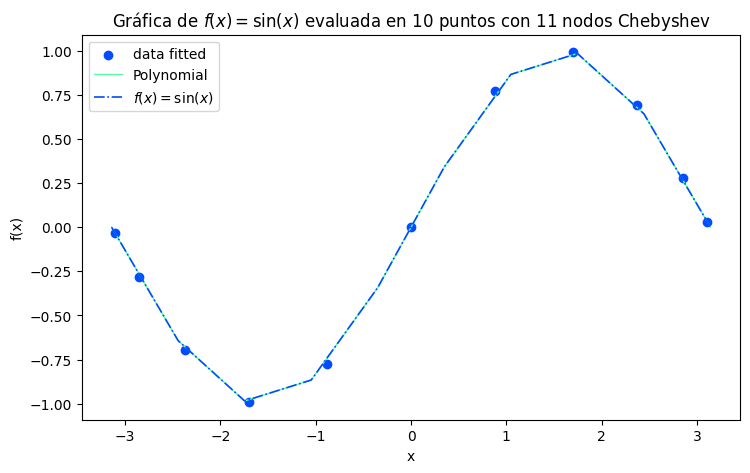

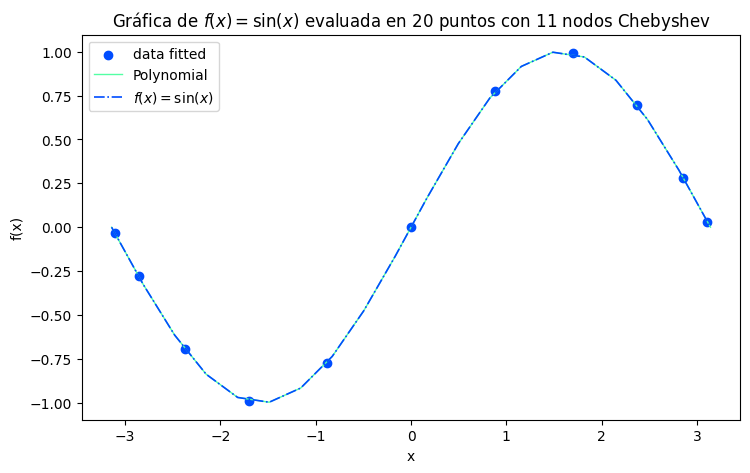

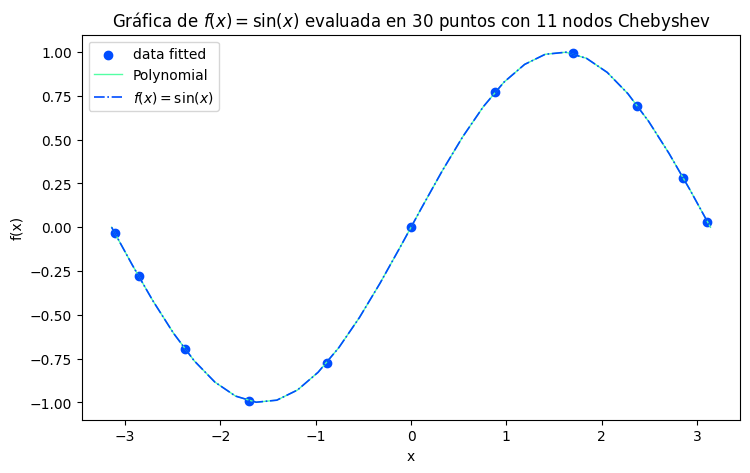

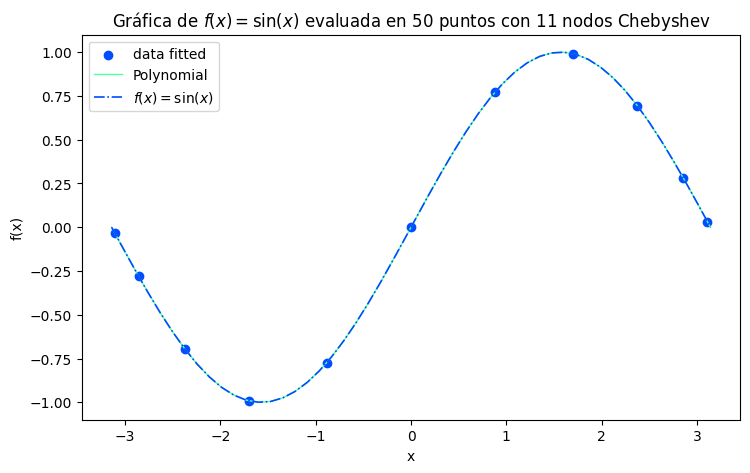

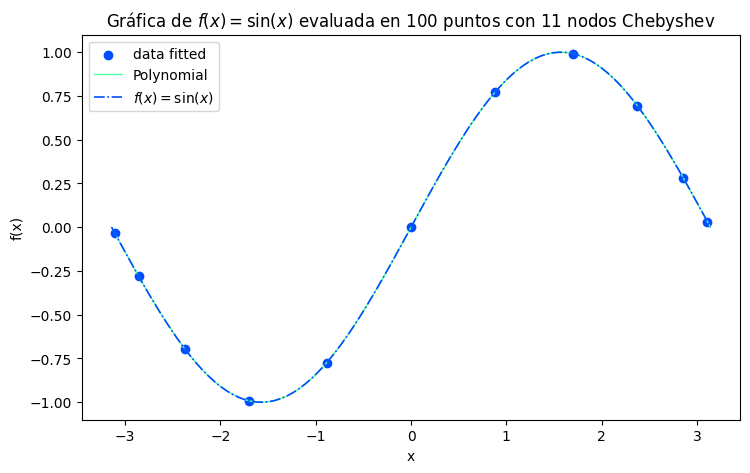

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


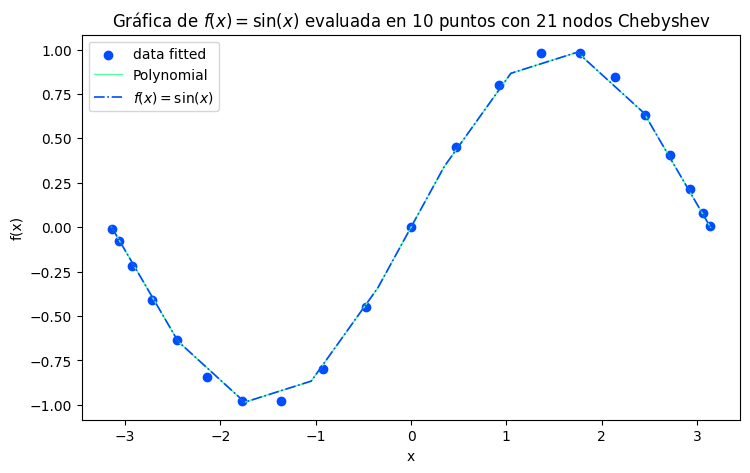

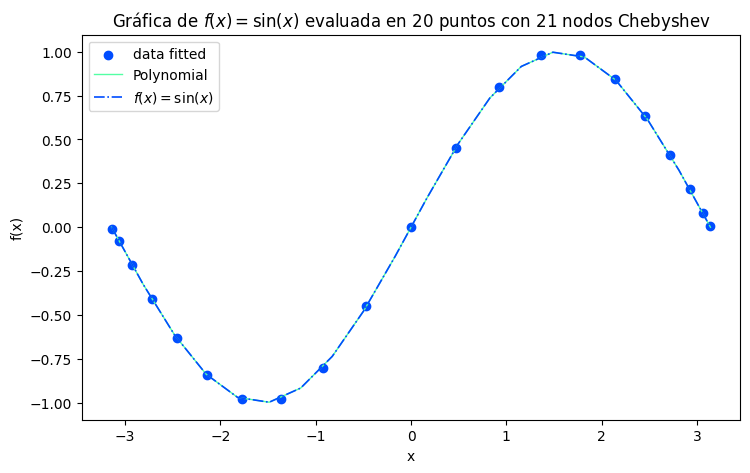

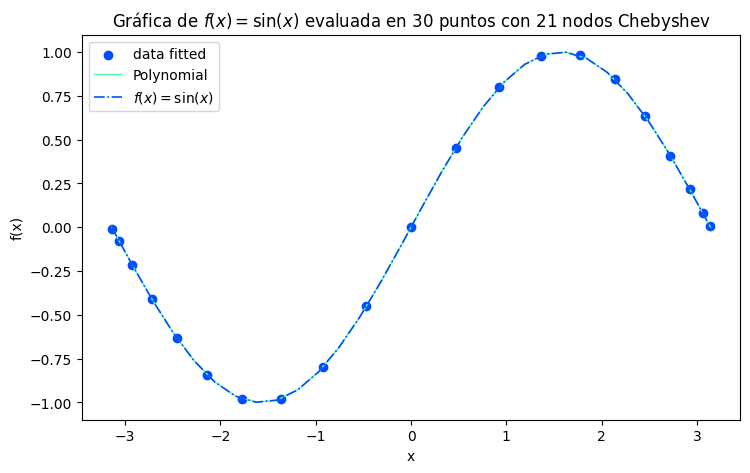

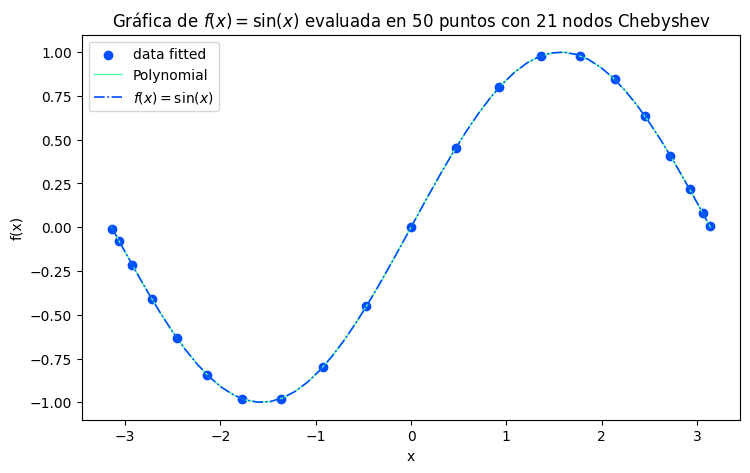

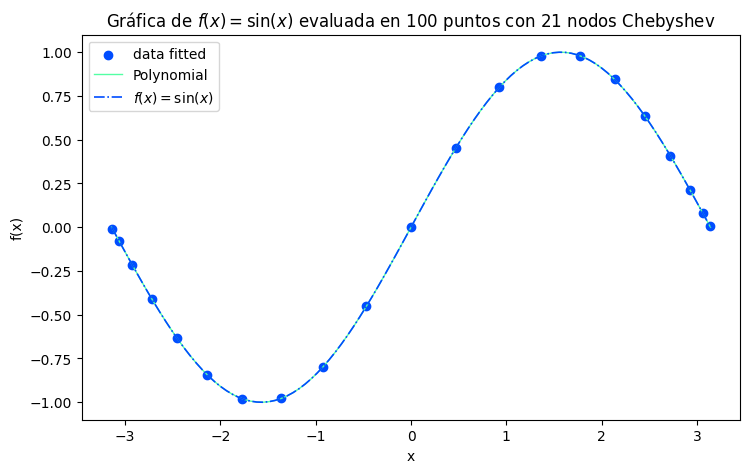

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


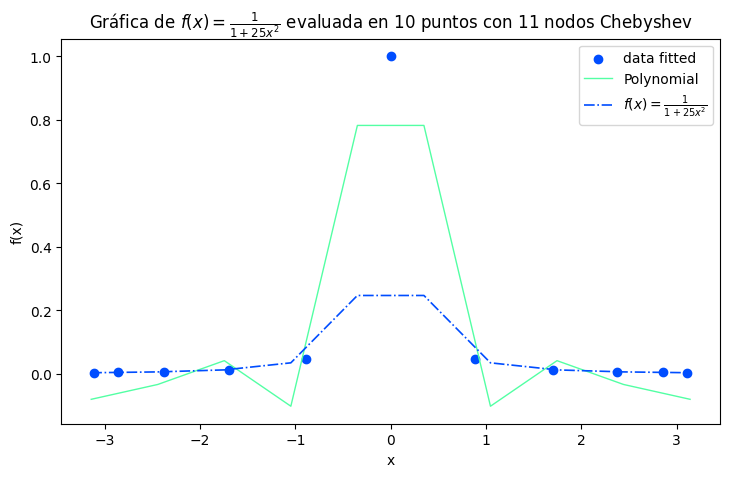

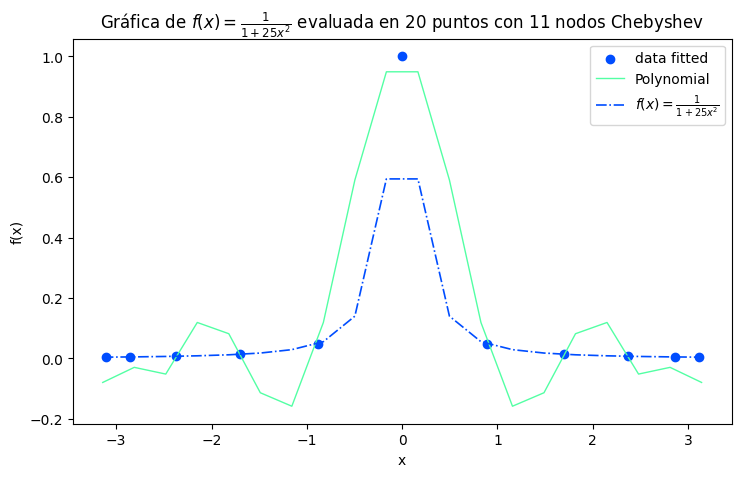

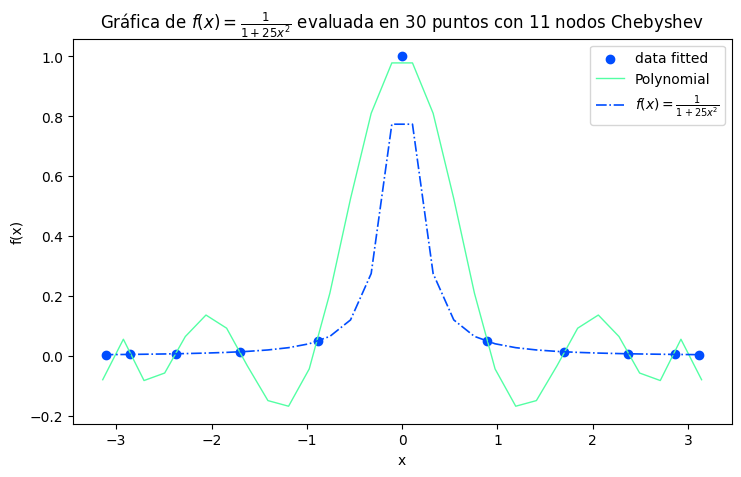

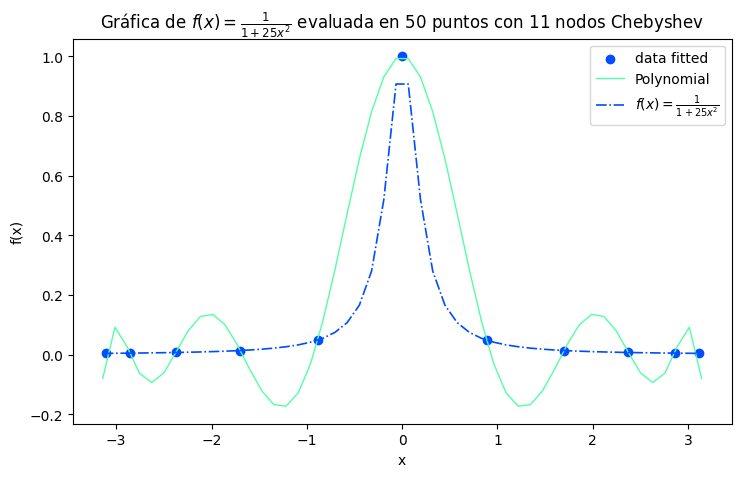

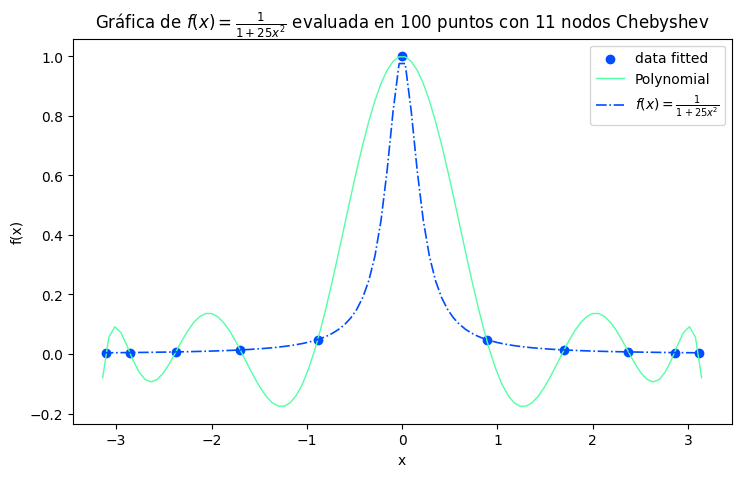

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


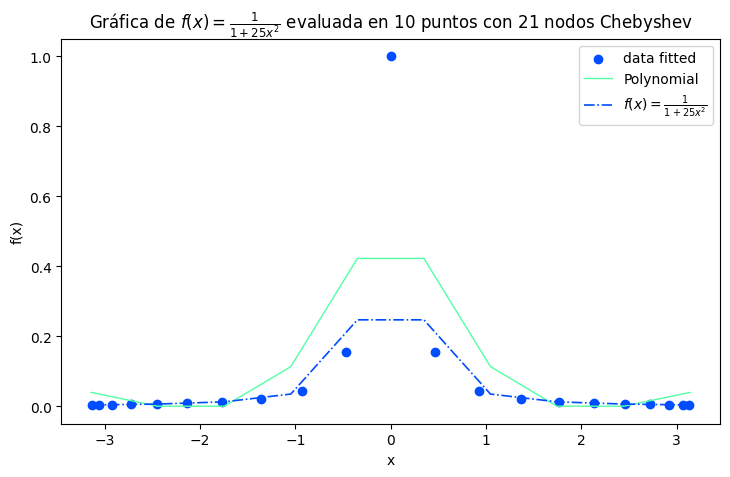

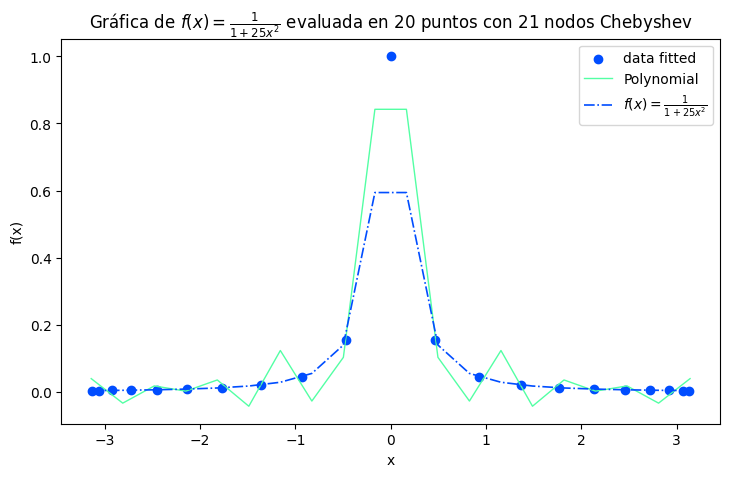

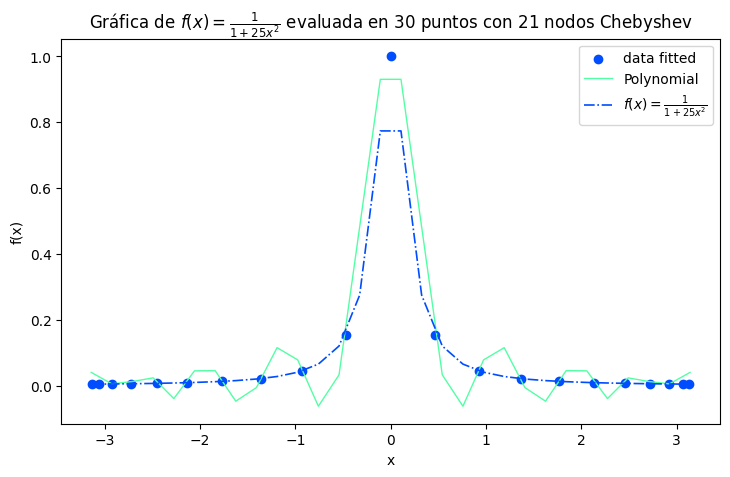

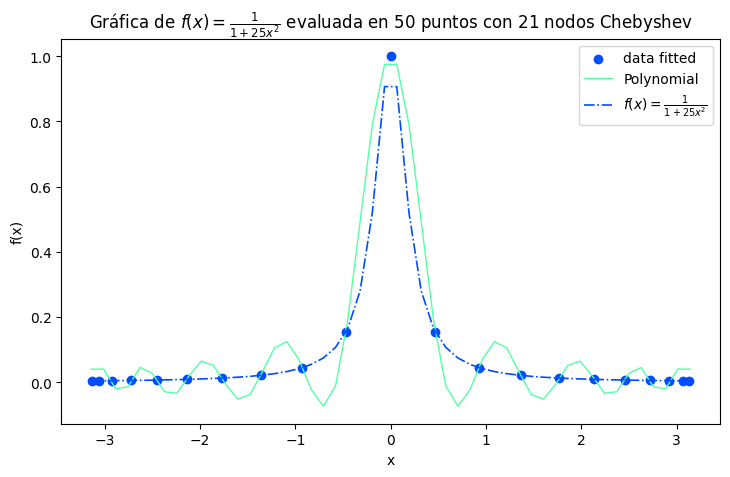

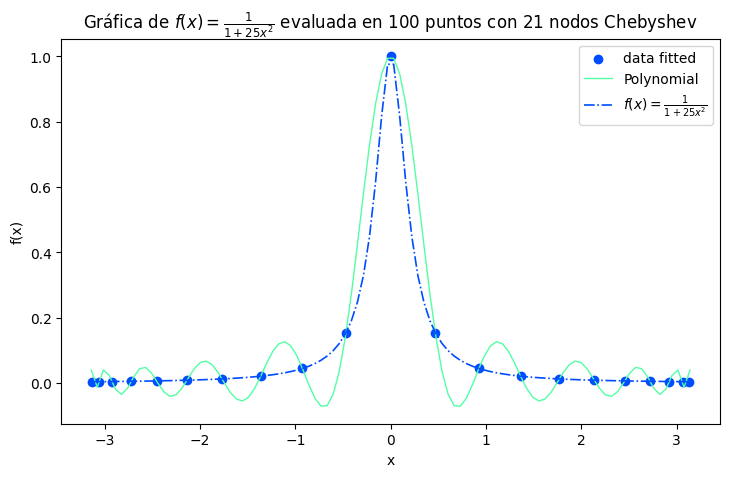

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


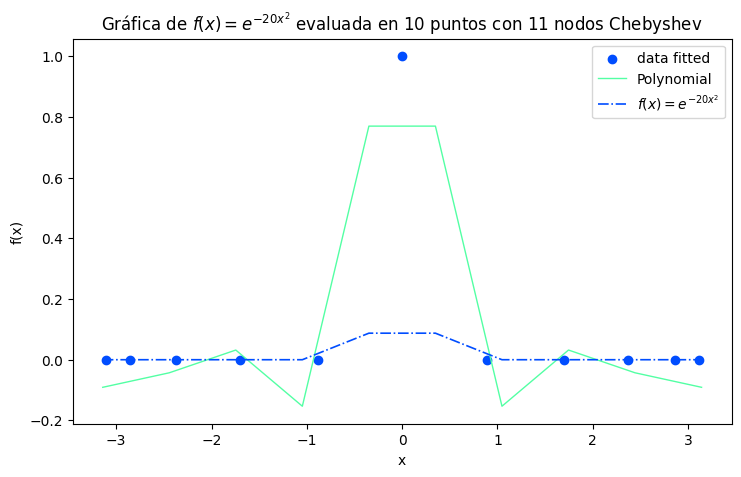

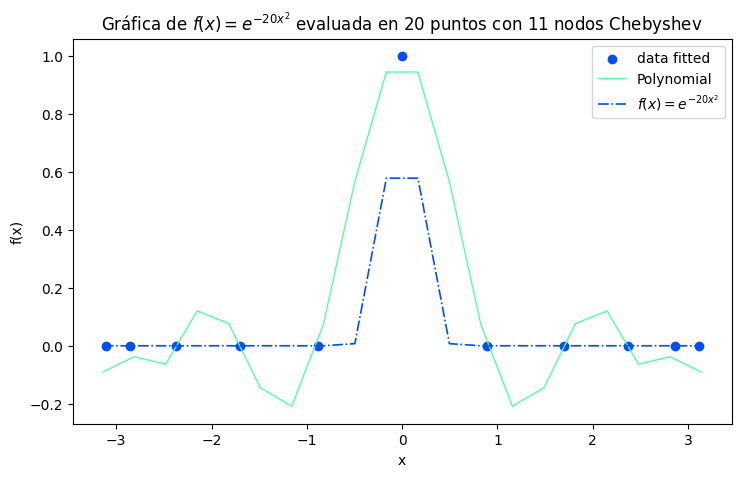

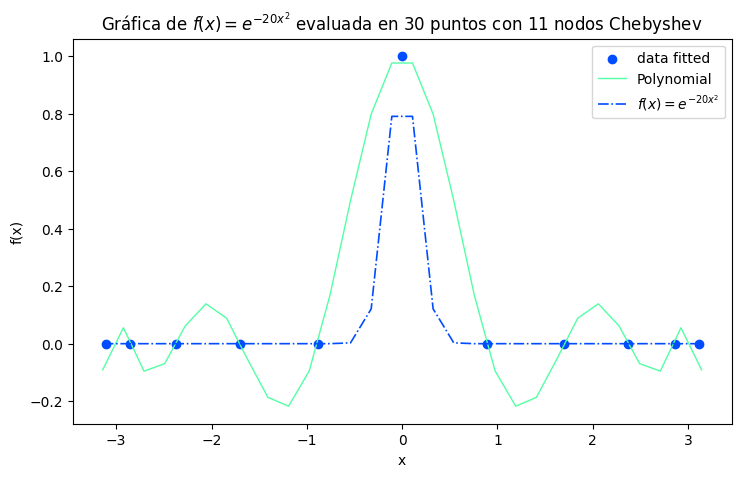

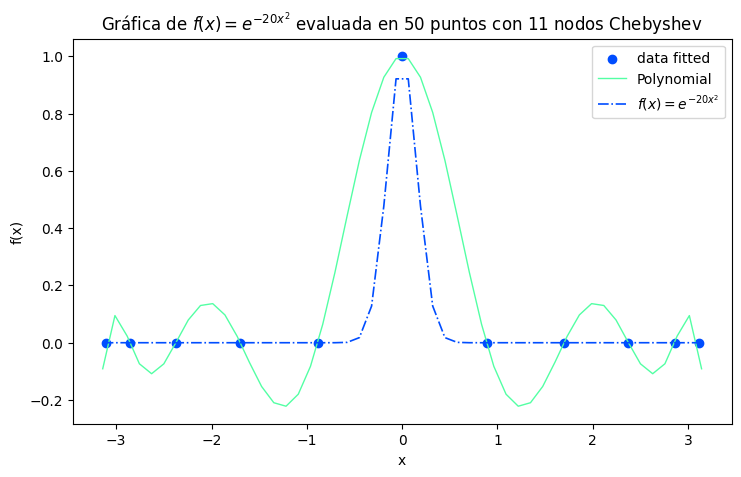

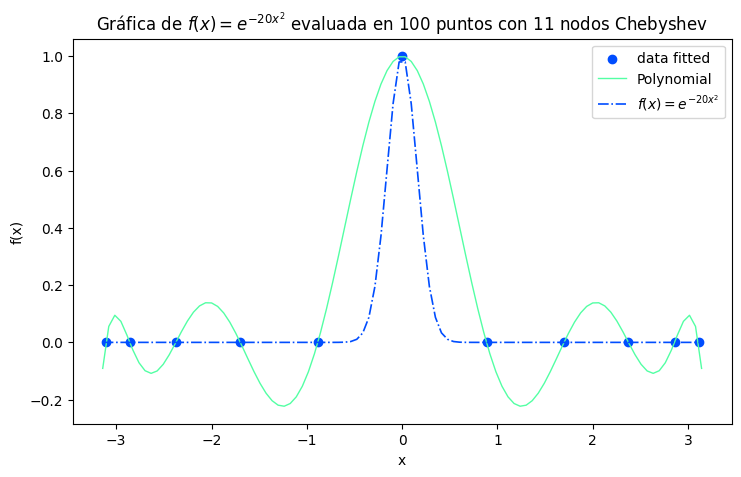

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


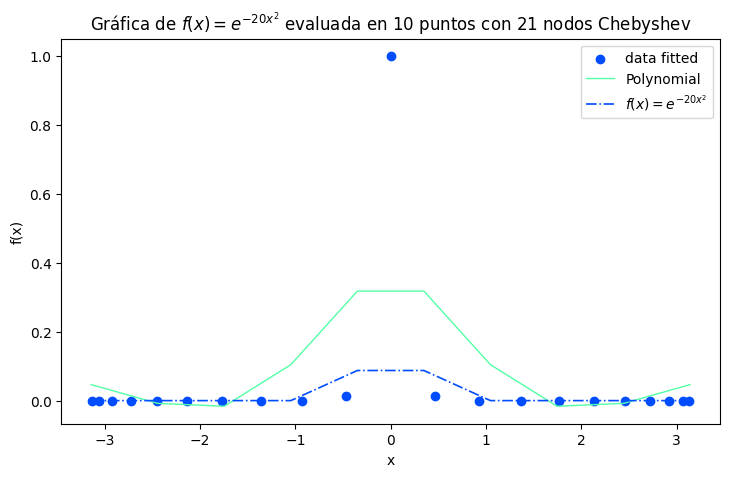

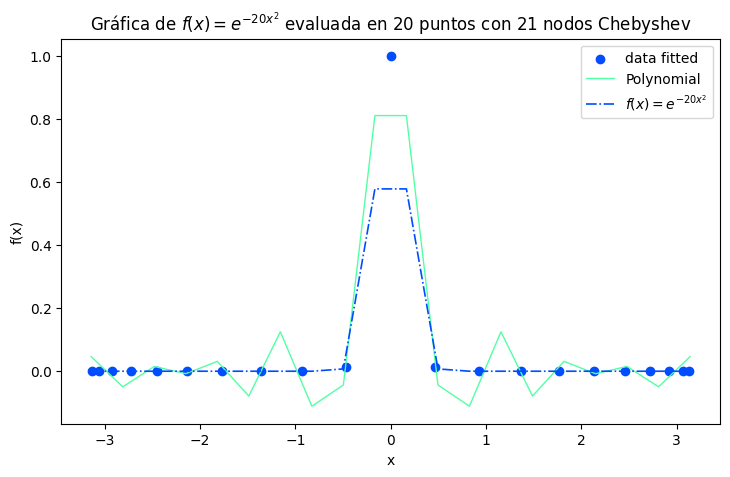

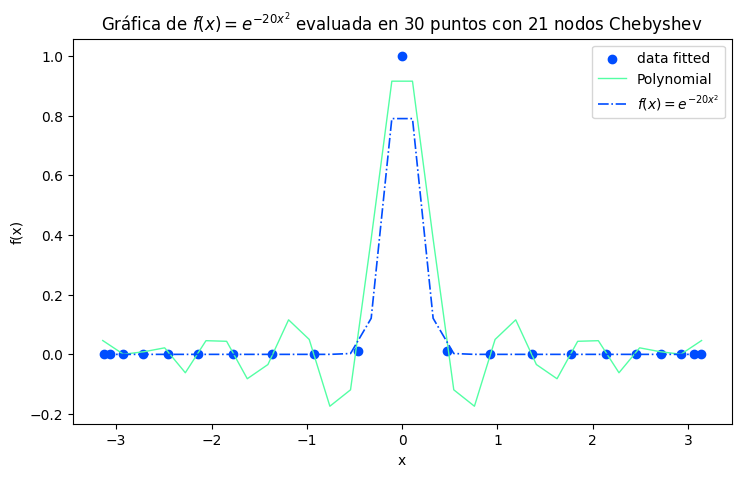

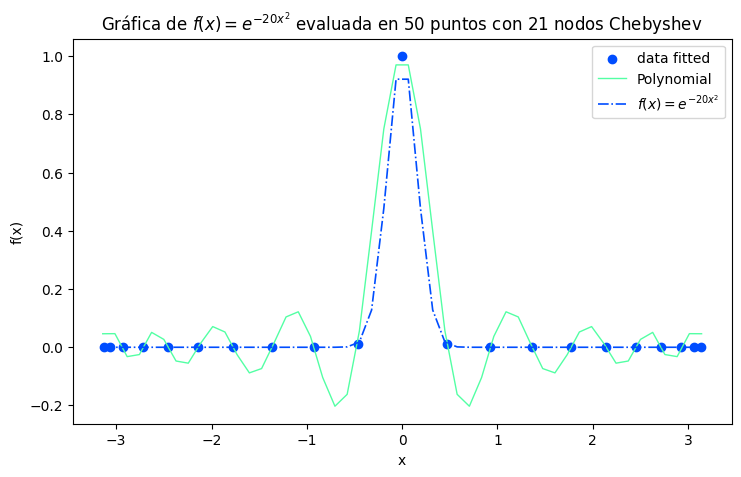

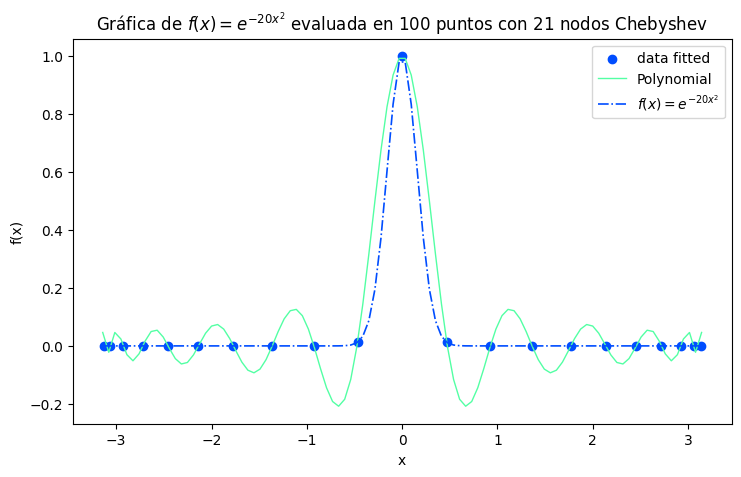

In [51]:
# establecemos alias para las funciones de trabajo:
# seno, fracción, exponencial
n = [10, 20, 30, 50, 100]
interval = [-np.pi, np.pi]
# interval = [-5, 5]


df_ch_11_f1 = sensibility_analysis(n_evaluation=n,
                    interval=interval,
                    x_data=x_ch_11,
                    w_data=w_ch_11_f1,
                    f_evaluate=y_1,
                    f_name=r"$f(x) = \sin(x)$",
                    method="Chebyshev")

df_ch_21_f1 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_ch_21,
                     w_data=w_ch_21_f1,
                     f_evaluate=y_1,
                    f_name=r"$f(x) = \sin(x)$",
                    method="Chebyshev")

df_ch_11_f2 = sensibility_analysis(n_evaluation=n,
                    interval=interval,
                    x_data=x_ch_11,
                    w_data=w_ch_11_f2,
                    f_evaluate=y_2,
                    f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                    method="Chebyshev")

df_ch_21_f2 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_ch_21,
                     w_data=w_ch_21_f2,
                     f_evaluate=y_2, f_name=r"$f(x) = \frac{1}{1 + 25x^2}$", method="Chebyshev")

df_ch_11_f3 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_ch_11,
                     w_data=w_ch_11_f3,
                     f_evaluate=y_3, f_name=r"$f(x) = e^{-20x^2}$", method="Chebyshev")

df_ch_21_f3 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_ch_21,
                     w_data=w_ch_21_f3,
                     f_evaluate=y_3, f_name=r"$f(x) = e^{-20x^2}$", method="Chebyshev")



<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


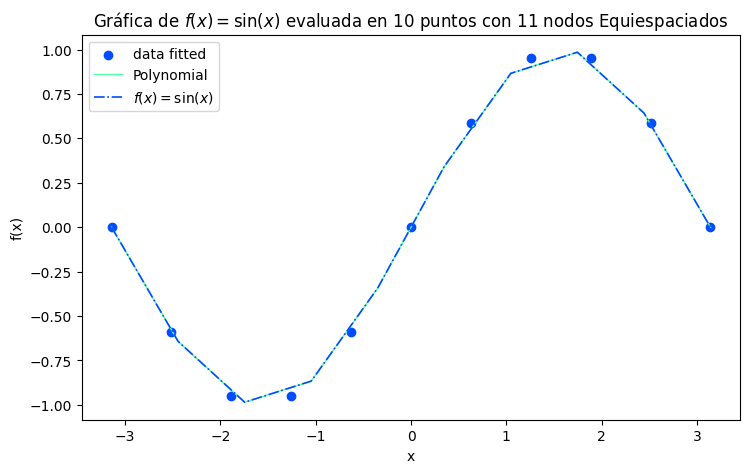

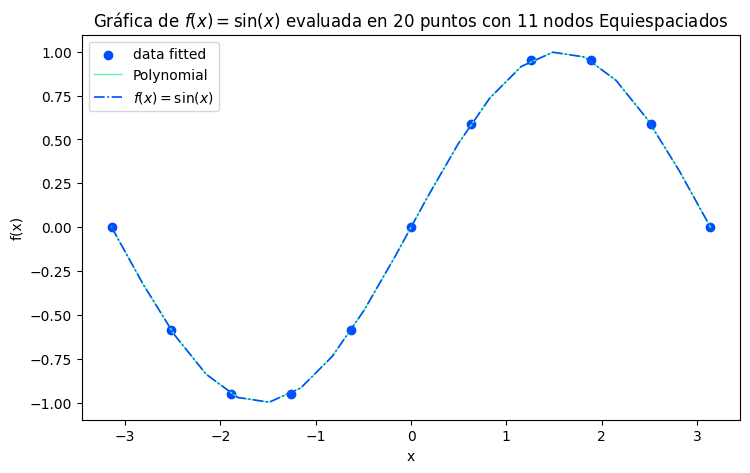

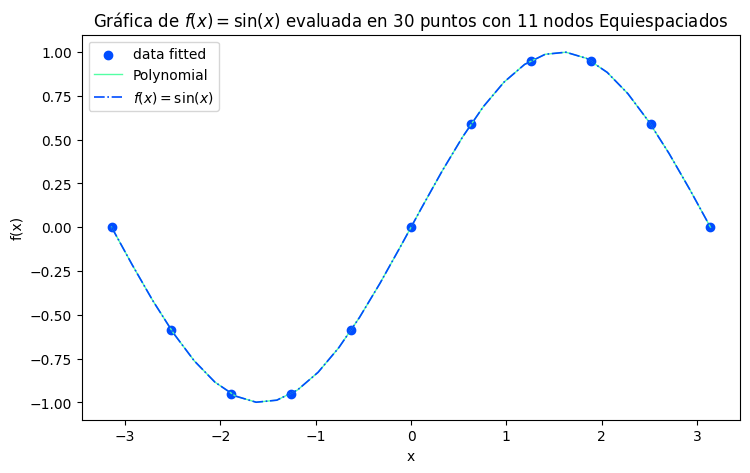

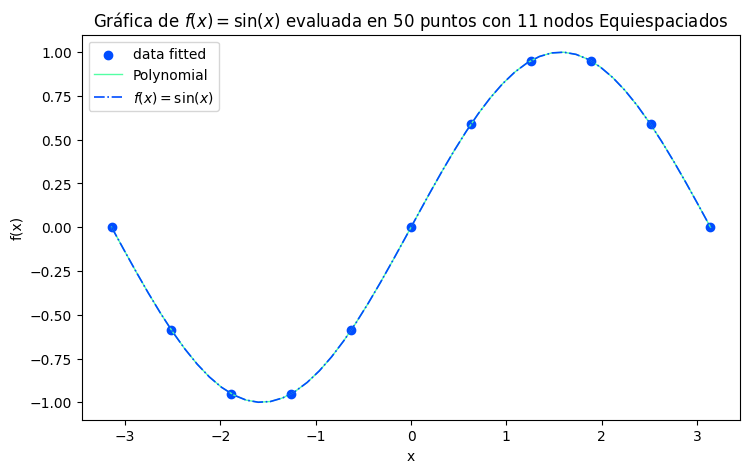

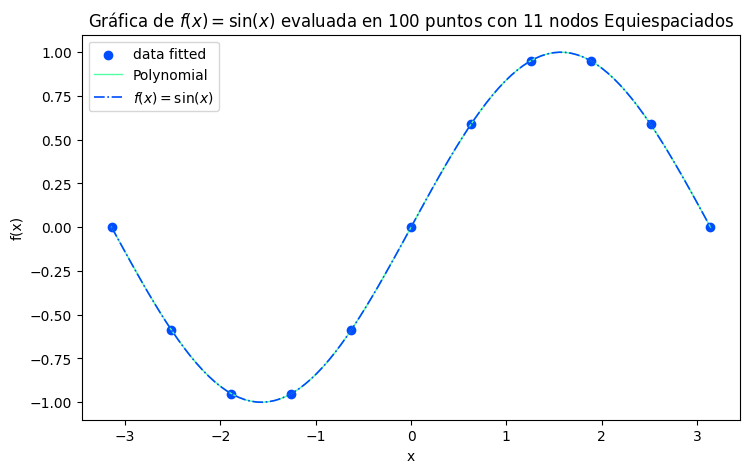

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


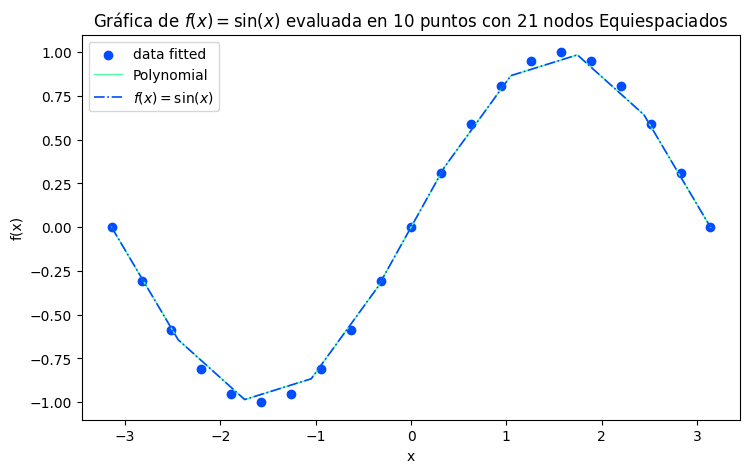

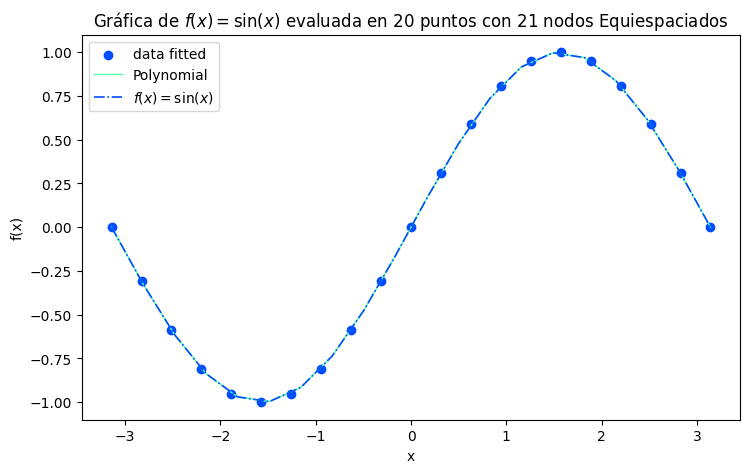

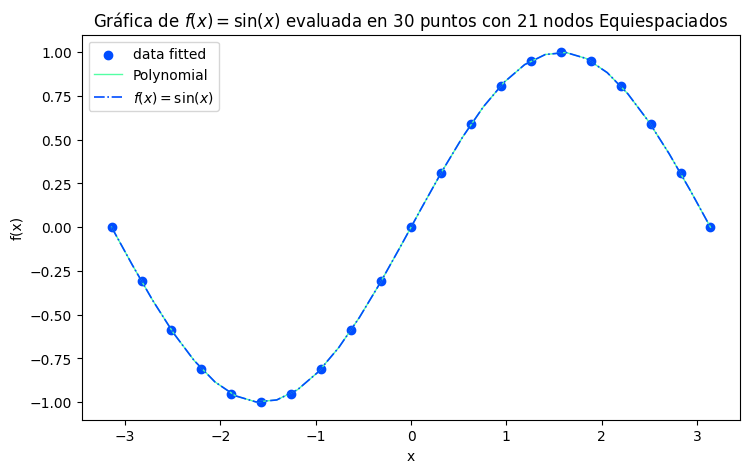

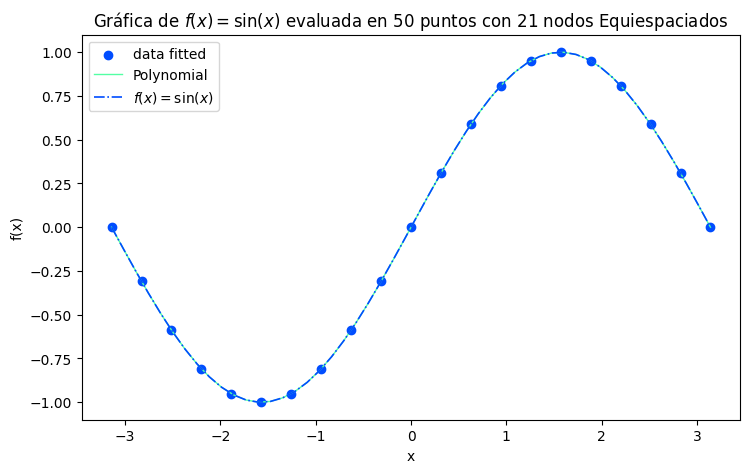

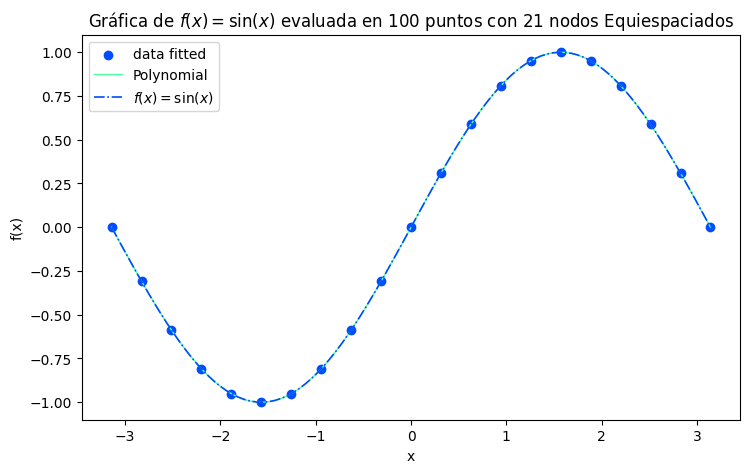

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


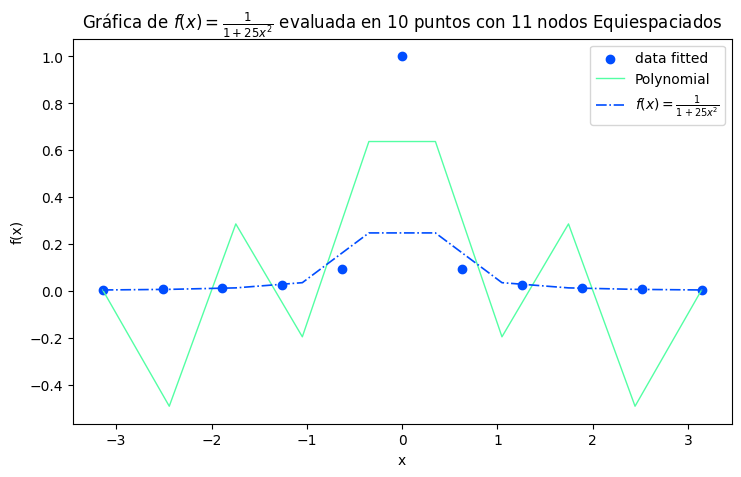

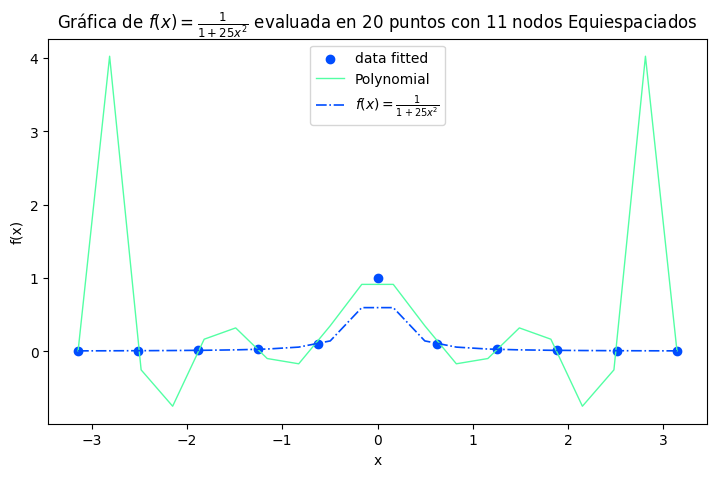

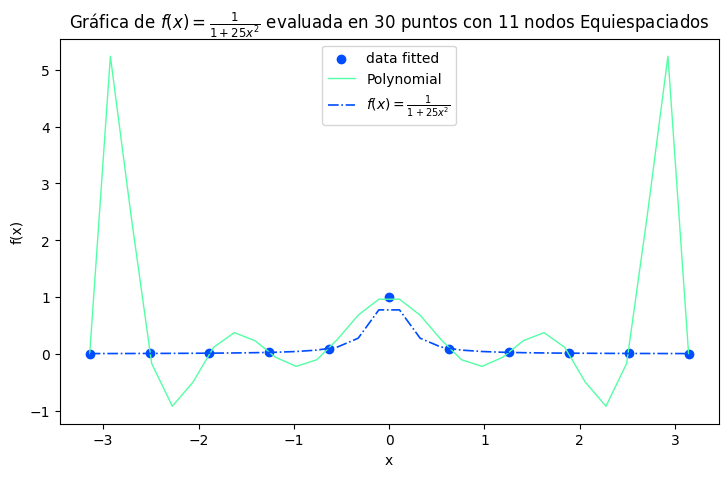

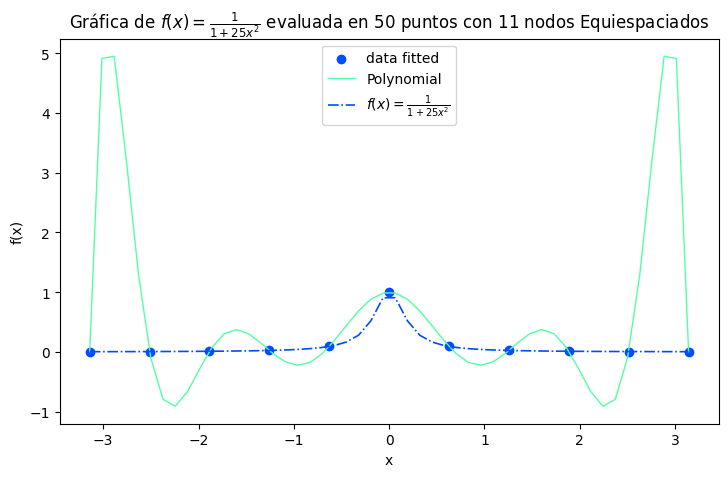

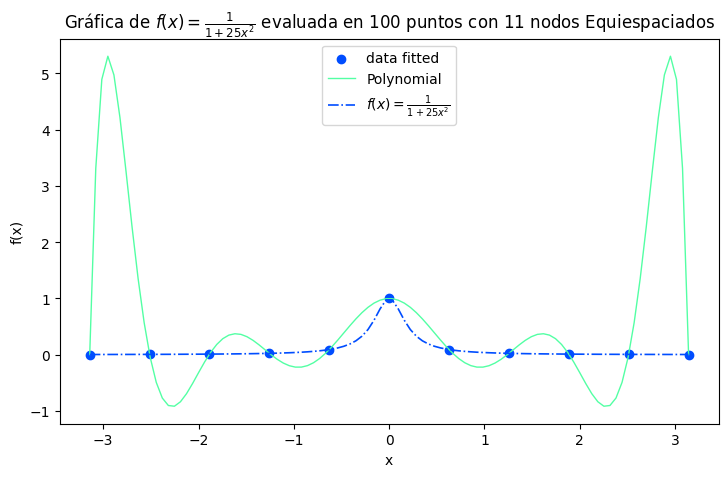

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


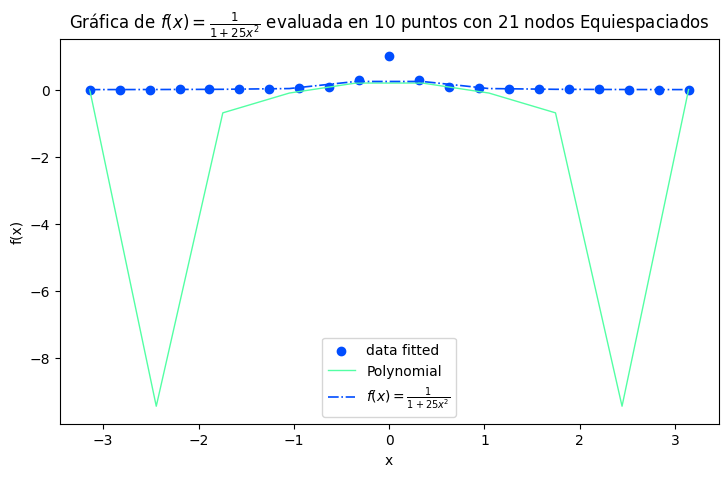

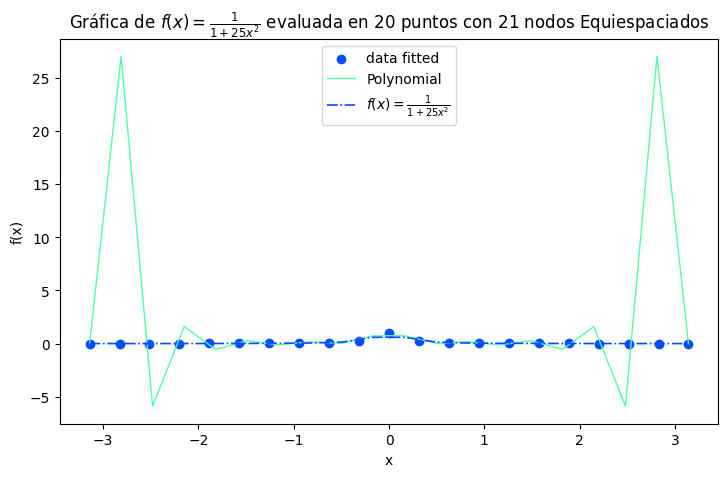

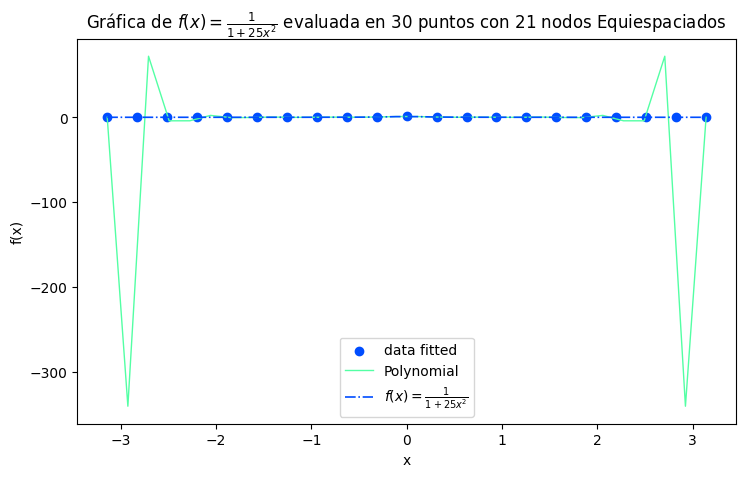

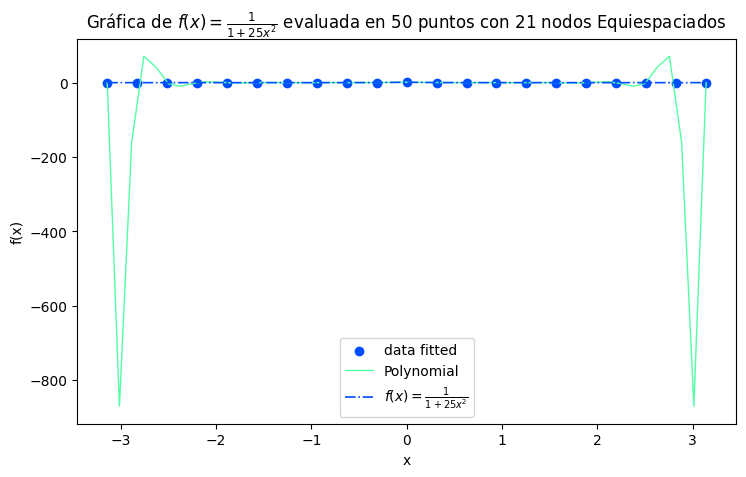

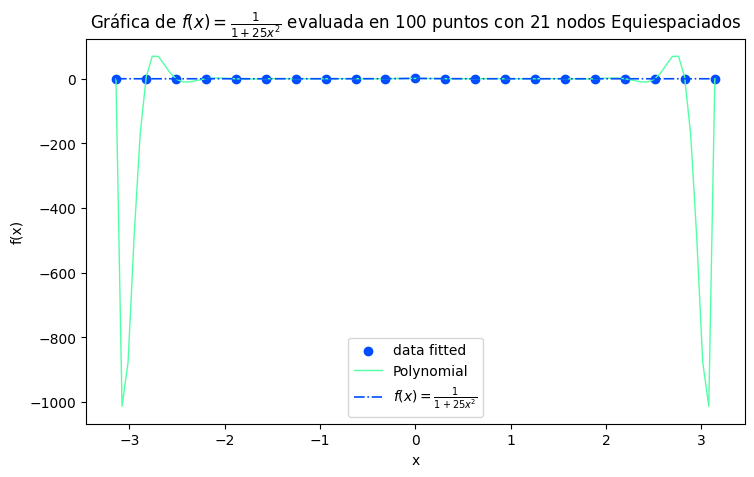

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


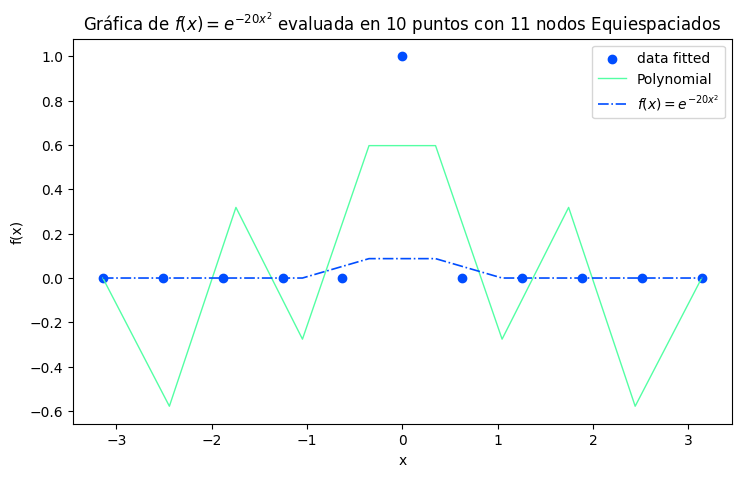

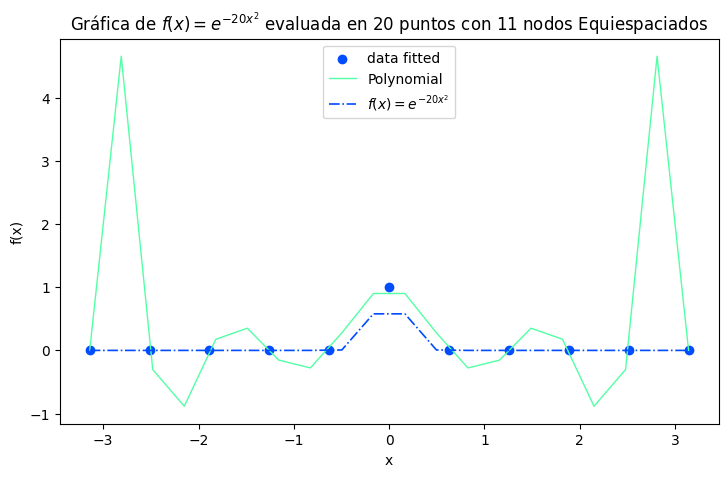

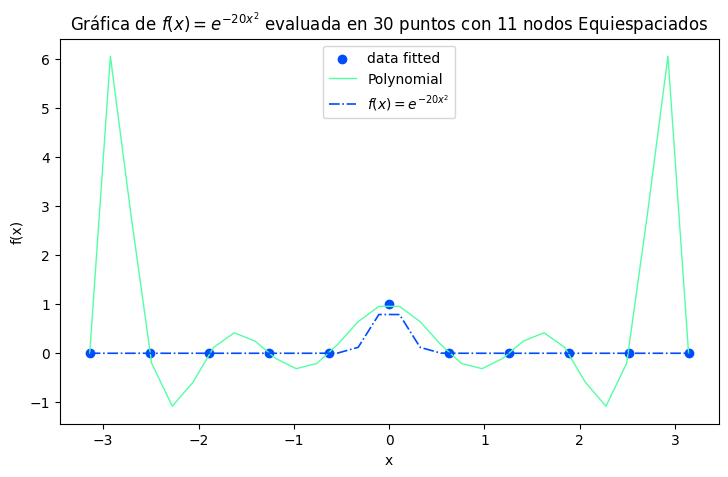

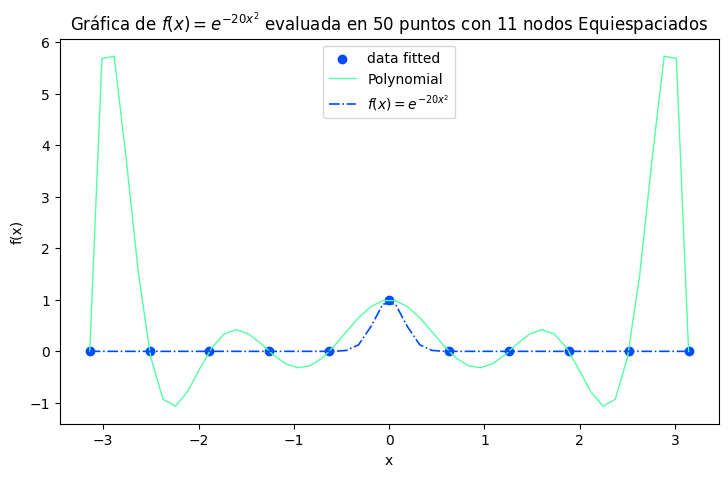

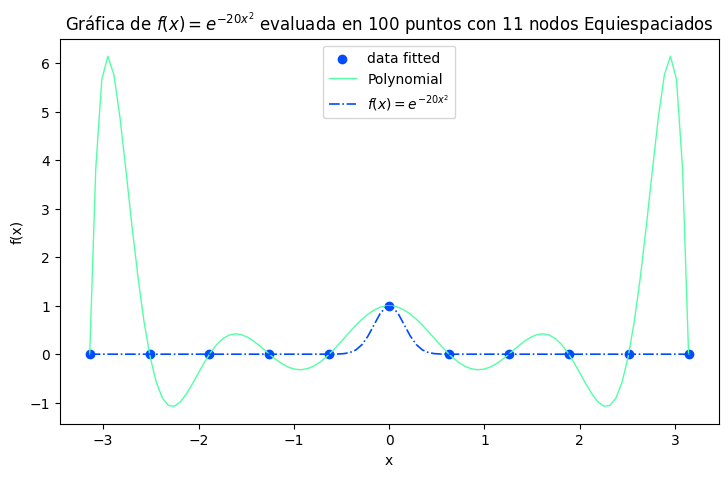

<ipython-input-8-c68a26ccf766>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_data, w_data, label='data fitted', c=cmap(0.2))


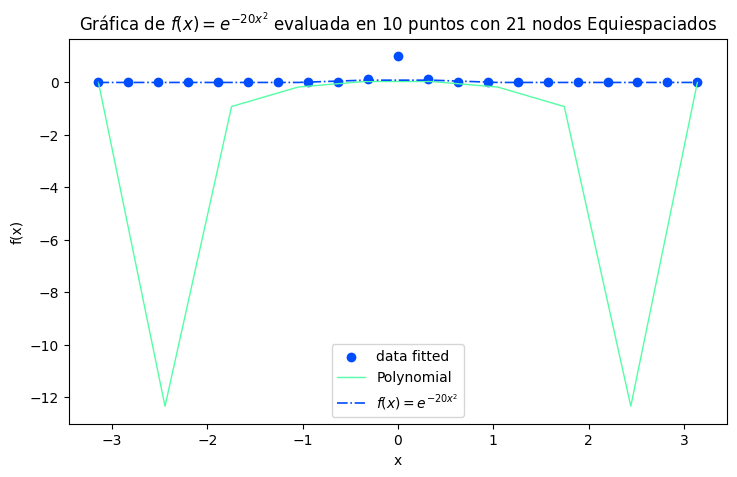

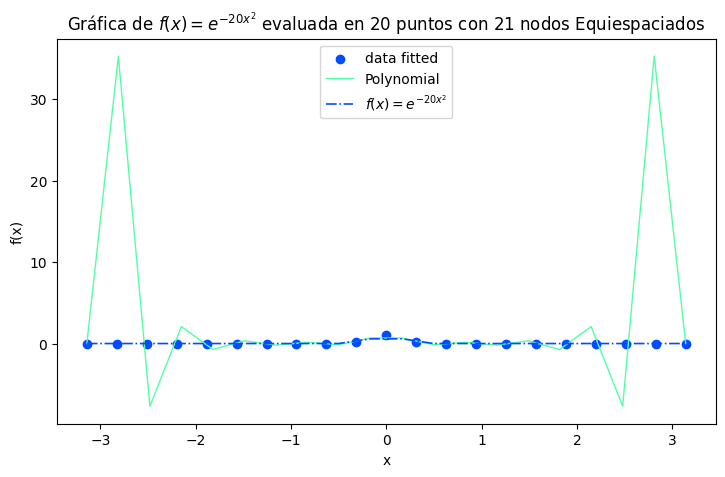

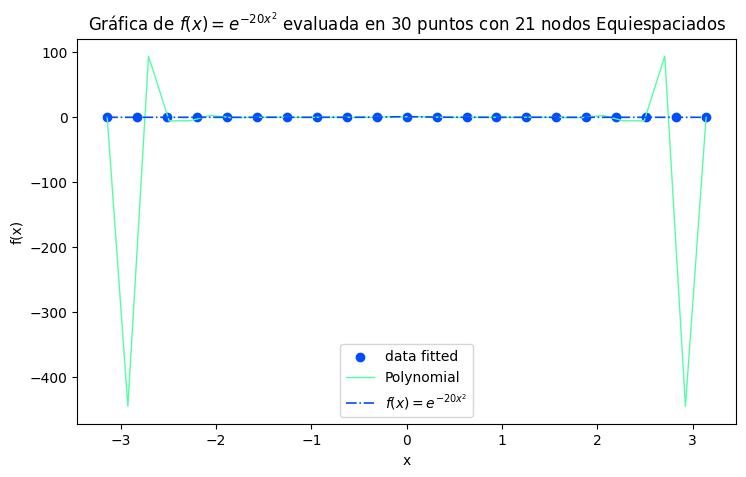

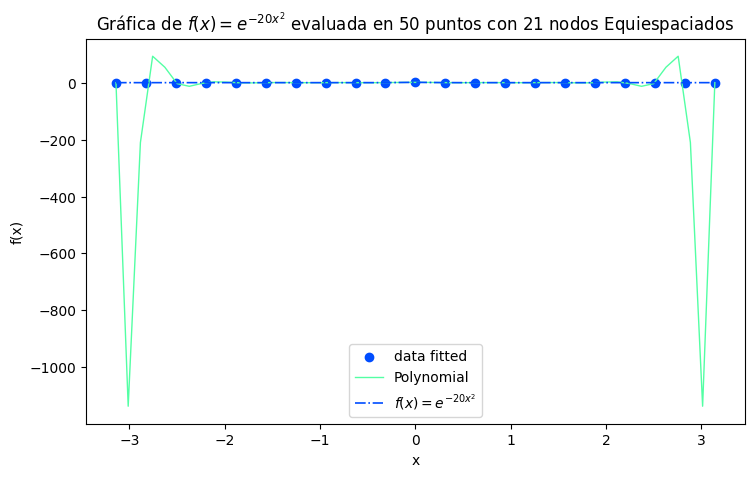

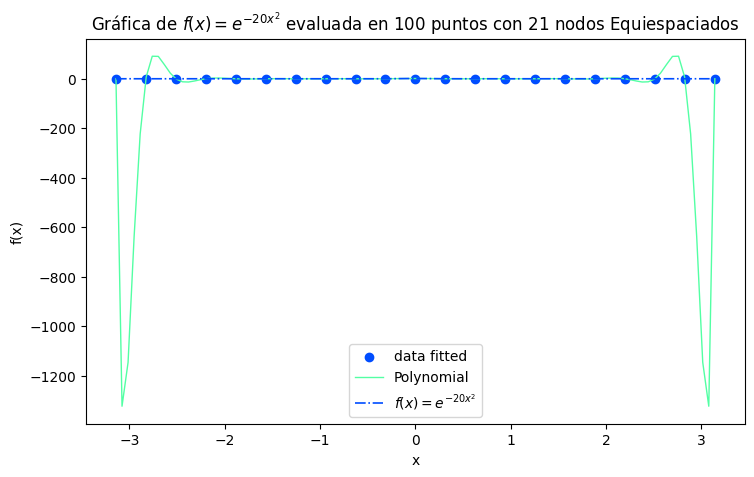

In [52]:
# Para nodos equiespaciados

df_equi_11_f1 = sensibility_analysis(n_evaluation=n,
                    interval=interval,
                    x_data=x_equi_11,
                    w_data=w_equi_11_f1,
                    f_evaluate=y_1,
                    f_name=r"$f(x) = \sin(x)$",
                    method="Equiespaciados")

df_equi_21_f1 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_equi_21,
                     w_data=w_equi_21_f1,
                     f_evaluate=y_1,
                    f_name=r"$f(x) = \sin(x)$",
                    method="Equiespaciados")

df_equi_11_f2 = sensibility_analysis(n_evaluation=n,
                    interval=interval,
                    x_data=x_equi_11,
                    w_data=w_equi_11_f2,
                    f_evaluate=y_2,
                    f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                    method="Equiespaciados")

df_equi_21_f2 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_equi_21,
                     w_data=w_equi_21_f2,
                     f_evaluate=y_2,
                    f_name=r"$f(x) = \frac{1}{1 + 25x^2}$",
                    method="Equiespaciados")

df_equi_11_f3 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_equi_11,
                     w_data=w_equi_11_f3,
                     f_evaluate=y_3, f_name=r"$f(x) = e^{-20x^2}$", method="Equiespaciados")

df_equi_21_f3 = sensibility_analysis(n_evaluation=n,
                     interval=interval,
                     x_data=x_equi_21,
                     w_data=w_equi_21_f3,
                     f_evaluate=y_3, f_name=r"$f(x) = e^{-20x^2}$", method="Equiespaciados")


In [53]:
df_r = pd.concat([df_ch_11_f1,
                  df_ch_21_f1,
                  df_ch_11_f2,
                  df_ch_21_f2,
                  df_ch_11_f3,
                  df_ch_21_f3,
                  df_equi_11_f1,
                  df_equi_21_f1,
                  df_equi_11_f2,
                  df_equi_21_f2,
                  df_equi_11_f3,
                  df_equi_21_f3], axis=0)
df_r

,Método,Función,Puntos evaluados,Nodos,Error absoluto,Tiempo (s)
10,Chebyshev,seno,10,11,0.0000,0.768018
20,Chebyshev,seno,20,11,0.0001,0.89666
30,Chebyshev,seno,30,11,0.0001,0.747029
50,Chebyshev,seno,50,11,0.0002,0.789101
100,Chebyshev,seno,100,11,0.0004,0.702134
10,Chebyshev,seno,10,21,0.0000,0.940265
20,Chebyshev,seno,20,21,0.0000,2.258887
30,Chebyshev,seno,30,21,0.0000,1.210318
50,Chebyshev,seno,50,21,0.0000,0.806252
100,Chebyshev,seno,100,21,0.0000,0.510899


A efectos visuales se ha configurado el eje `y` en escala logarítmica de los gráficos de error, tal como se muestra a continuación.

<Figure size 1000x700 with 0 Axes>

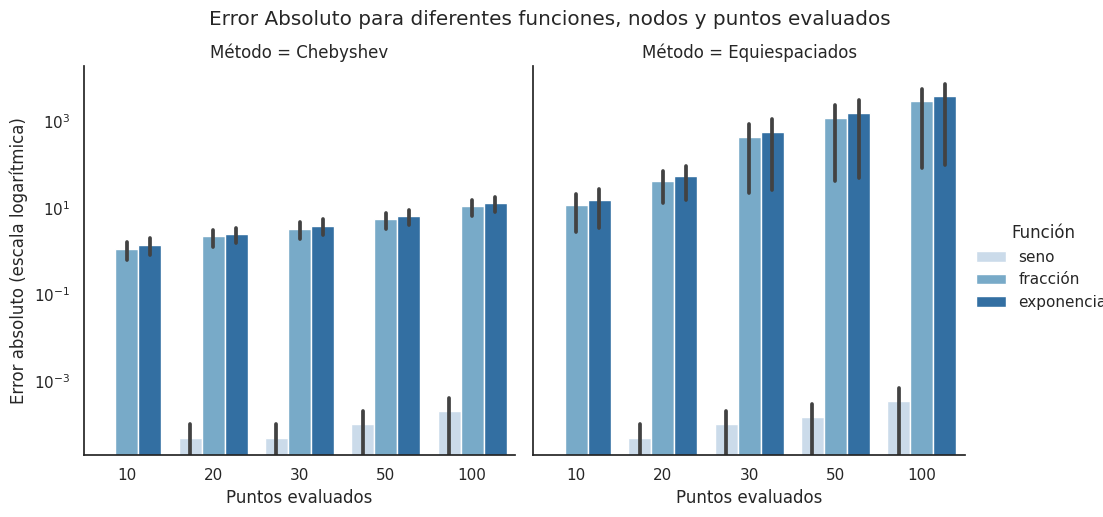

In [54]:
sns.set(style="white")
df = df_r.copy()
df = df.reset_index()
df = df.sort_values(by=['Error absoluto'], ascending=True)
df['Error absoluto'] = df['Error absoluto'].astype(float)
df['Tiempo (s)'] = df['Tiempo (s)'].astype(float)
df['Nodos'] = df['Nodos'].astype(float)
# df.info()
plt.figure(figsize=(10, 7))
# sns.barplot(x="Puntos evaluados", y="Error absoluto", hue="Función", data=df, palette='Blues')
g = sns.catplot(x="Puntos evaluados",
                y="Error absoluto",
                hue="Función",
                col="Método",
                kind="bar",
                data=df,
                palette='Blues')
plt.suptitle("Error Absoluto para diferentes funciones, nodos y puntos evaluados", y=1.03)

# Configuración de los ejes en escala logarítmica
ax = g.axes.flat[0]
ax.set_yscale("log")
ax.set_ylabel('Error absoluto (escala logarítmica)')
sns.despine()
g._legend.set_bbox_to_anchor((0.98, 0.5))
g._legend.set_title("Función")
plt.show()

<Figure size 1000x700 with 0 Axes>

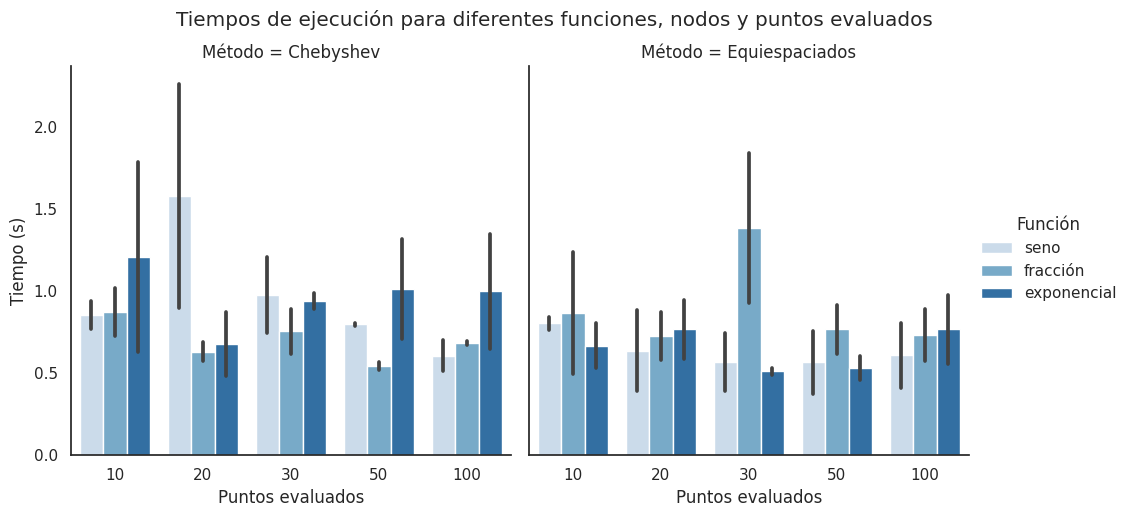

In [55]:
plt.figure(figsize=(10, 7))
sns.catplot(x="Puntos evaluados", y="Tiempo (s)", hue="Función", col="Método",
                kind="bar", data=df, palette='Blues')
plt.suptitle("Tiempos de ejecución para diferentes funciones, nodos y puntos evaluados", y=1.03)
plt.show()

### Conclusiones
A continuación, describiremos los hallazgos más relevantes encontrados hasta esta parte:

* Se destaca la marcada inestabilidad observada cuando se intenta evaluar un polinomio de grado 20 (21 nodos) para las funciones $\frac{1}{1 + 25x^2}$ y $e^{-20x^2}$ dentro del intervalo $[-\pi, \pi]$ en 20 o más puntos de $x$. Este hecho se observa tanto si lo nodos son `equiespaciados` como si fueron obtenidos por `Chebyshev`. Vale resaltar que este comportamiento era esperable dada la existencia del fenómeno de `Runge` citado por la misma documentación de `Scipy` cuando se utilizan interpolaciones de `Lagrange`.

* En cuanto a los valores de error, se ha encontrado que éstos son mínimos en en los polinomios grado 10 y 20 obtenidos a partir de la función $\sin(x)$, mientras que para las funciones $\frac{1}{1 + 25x^2}$ y $e^{-20x^2}$ el error absoluto aumenta de manera considerable. Esto se debe a las marcadas oscilaciones arrojadas por los polinomios de `Lagrange` en los extremos de las funciones antesmencionadas.

* Análogamente, los valores de error absoluto obtenidos de los polinomios grado 10 y 20 evaluados en las funciones $\frac{1}{1 + 25x^2}$ y $e^{-20x^2}$ son aun más pronunciados y evidentes para nodos `equiespaciados`.

* Los tiempos de ejecución en segundos han sido mayores cuando se tratan de ajustar polinomios de grado 10 y 20 con nodos `equiespaciados`, que cuando los nodos han sido obtenidos para `Chebyshev`. No se encotró relación lineal entre los tiempos de ejecución y el tipo de función que se estaba aproximando.

* El fenómeno de `Runge` se hace mucho más evidente en aquellas funciones cuyos extremos sea lineales con pendiente 0, como es el caso de las funciones $\frac{1}{1 + 25x^2}$ y $e^{-20x^2}$.

* Para la aproximación polinomica de las funciones $\frac{1}{1 + 25x^2}$ y $e^{-20x^2}$ se recomiendan métodos alternativos como `trazadores cúbicos` los cuales serán aplicados más adelante en esta actividad.

## REFERENCIAS

* Pinkus, A. (2000). Weierstrass and approximation theory. Journal of Approximation Theory, 107(1), 1-66.
* Triguero, P. (2023). Tema 3. Interpolación. Métodos Numéricos Aplicados I. UNIR